In [758]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer 
import nltk

In [875]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arensimmons/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [922]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arensimmons/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
reviews = pd.read_csv('Amazon_reviews.csv')

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
reviews = reviews.drop('Unnamed: 0', axis = 1)

In [6]:
#Creating a Helpfulness column noted as a binary 
reviews['Helpful_review'] = np.where(reviews['vote'] > 0, 'yes', 'no')
reviews['Helpfulness'] = reviews['Helpful_review']
reviews['Helpfulness'] = reviews['Helpful_review'].replace({'yes':1, 'no':0})

In [7]:
reviews.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,verified,vote,...,description,details,price,rank,similar_item,title,main_cat,category,Helpful_review,Helpfulness
0,0143026860,5.0,Spellbound - I just could not put the book down.,2017-10-23,A1ME71SSJULX11,Vuyokazi,NaN,Spellbound,True,0,...,['This is the NEW PURPLE BOTTLE that just came...,NaN,NaN,1462563.0,NaN,Black Diamond,NaN,all_beauty,no,0
1,0143026860,3.0,"Before the written word, stories were passed o...",2015-05-14,A24VCDADYAIHAM,Gridley,NaN,Telling Tales as of Old,True,0,...,['This is the NEW PURPLE BOTTLE that just came...,NaN,NaN,1462563.0,NaN,Black Diamond,NaN,all_beauty,no,0
2,0143026860,5.0,"Enjoyed book, written very well",2017-05-26,A1WR0R3LZVUEU3,Addie Woods,NaN,Buy the book,True,0,...,['This is the NEW PURPLE BOTTLE that just came...,NaN,NaN,1462563.0,NaN,Black Diamond,NaN,all_beauty,no,0
3,0143026860,5.0,This was a good story of the Black leagues. I ...,2011-12-25,A6IKXKZMTKGSC,shoecanary,NaN,"More than facts, a good story read!",True,5,...,['This is the NEW PURPLE BOTTLE that just came...,NaN,NaN,1462563.0,NaN,Black Diamond,NaN,all_beauty,yes,1
4,0143026860,5.0,okay,2016-09-13,A1QH9MVF3HPZIP,Bicentennial Union High District #76,NaN,Five Stars,True,0,...,['This is the NEW PURPLE BOTTLE that just came...,NaN,NaN,1462563.0,NaN,Black Diamond,NaN,all_beauty,no,0


In [8]:
#Showing a breakdown of how many helpful reviews there are
reviews['Helpful_review'].value_counts()

no     258831
yes     56169
Name: Helpful_review, dtype: int64

In [9]:
56169/315000

0.1783142857142857

We see the percentage of helpful reviews overall is 17.8%

In [10]:
reviews['category'].value_counts()
#Breaking the categories for each review

movies                 15000
pet_supplies           15000
cds_and_vinyl          15000
luxury_beauty          15000
prime_pantry           15000
tools                  15000
office_products        15000
appliances             15000
industrial             15000
grocery                15000
arts_crafts            15000
automotive             15000
all_beauty             15000
amazon_fashion         15000
video_games            15000
musical_instruments    15000
patio                  15000
kindle                 15000
toys                   15000
music                  15000
software               15000
Name: category, dtype: int64

In [11]:
table = pd.pivot_table(reviews, index = 'category', aggfunc = 'count' , columns = 'Helpful_review',values = 'Helpfulness')

In [12]:
#How many reviews were found helpful for each category
table 

Helpful_review,no,yes
category,,
all_beauty,12585,2415
amazon_fashion,13452,1548
appliances,12804,2196
arts_crafts,12971,2029
automotive,13412,1588
cds_and_vinyl,9787,5213
grocery,12602,2398
industrial,13184,1816
kindle,12752,2248


In [15]:
reviews['main_cat'] = reviews['main_cat'].fillna(0)

In [16]:
reviews['main_cat'] = reviews['main_cat'].replace({0:'unknown'})

In [466]:
#Viewing the top 1% of reviews
top_reviews = reviews.sort_values(by = 'vote', axis = 0, ascending = False) 
top_reviews.head(3150)

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,verified,vote,...,Helpful_review,Helpfulness,top_1_pct,review_length,summary_length,year,buckets,review_length_buckets,summary_length_buckets,line_breaks
90492,B000CLUOAS,5.0,"I've gone to wearing my hair ""natural""--no che...",2010-10-05,A288V3U2VACS1W,luv2buy,NaN,Works Wonders for Black Hair,False,599,...,yes,1,yes,99,5,2010,0,51-100,0-5,2
259105,B00068IBZW,4.0,I will preface this review by saying that I pu...,2004-11-18,A34VRVI4CSI5RQ,Matt Morgan,NaN,"Excellent Security Suite, But Not Perfect",False,420,...,yes,1,yes,752,6,2004,0,500-1000,6-10,18
307603,B002P77432,4.0,"<div id=""video-block-RIERCF3RJCZ97"" class=""a-s...",2009-12-30,A1KBV71PGFFPVV,D. Bowman,NaN,Video Review: AX 720 vs. AX 180 Headset. Both ...,False,383,...,yes,1,yes,96,10,2009,0,51-100,6-10,4
148621,B016M9UFJ8,1.0,I've been using it for over 3 months and see n...,2016-03-10,AOE74NH28R8VG,Denise,NaN,Think Twice Before Buying,False,338,...,yes,1,yes,45,4,2016,0,0-50,0-5,0
264220,B0046ZLW1G,1.0,DO NOT TRUST They lie just bought this compute...,2011-11-01,A36DY91J9ATY8N,S. Herman,NaN,FAKE,False,307,...,yes,1,yes,39,1,2011,0,0-50,0-5,0
307275,B002B1TDV8,3.0,Here I am to spoil the party with the very fir...,2009-09-16,A38PJTBEH2LYE5,Jenny Penny,NaN,Overly ambitious project falls somewhat short,False,282,...,yes,1,yes,1073,6,2009,0,1001 - 2000,6-10,20
257677,B00008A6CF,5.0,I just bought Dragon NaturallySpeaking and I'v...,2003-06-14,A17NB397AH144H,ACS,NaN,Follow These Simple Tips and It'll Work Great!,False,282,...,yes,1,yes,676,9,2003,0,500-1000,6-10,5
58612,B019ZMX0O6,1.0,extremely misleading. The title said US Art S...,2016-04-28,NaN,NaN,{'Size:': ' 102-Piece Deluxe Bonus Set'},Be careful! extremely misleading.,False,281,...,yes,1,yes,150,4,2016,0,101-250,0-5,0
15627,B003XH69PW,4.0,I'm 5'2 and I'm 34 weeks pregnant and weigh 18...,2015-10-19,A3L3Y16PFCVB9D,Angel,"{'Size:': ' Small / Medium', 'Color:': ' Nude'}",good concept. But beware of sizing.,True,260,...,yes,1,yes,119,6,2015,0,101-250,6-10,0
49617,B005NK2ZZ0,5.0,"About 30 yrs. ago, my parents got me this same...",2012-03-12,NaN,NaN,NaN,Reacquainted,True,258,...,yes,1,yes,328,1,2012,0,251-500,0-5,8


In [467]:
#There is a cutoff that excludes 120 rows randomly, so I filtered out anything at the 17 vote cutoff as the top end of reviews
top_reviews = top_reviews.query('vote > 16')

In [19]:
#Using Naive Bayes to find predictive words for the highest helpfulness
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = .0001)

In [20]:
#Converting review text into a string for vectorization
reviews['reviewText'] = reviews['reviewText'].astype(str)

In [21]:
def make_xy(reviews, column, vectorizer=None):  
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(reviews[column])
    y = reviews['Helpful_review']
    return X, y 
X, y = make_xy(reviews, 'reviewText')

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3)

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [25]:
clf.fit(X_train,Y_train)
clf.predict(X_test)

array(['no', 'no', 'no', ..., 'no', 'yes', 'yes'], dtype='<U3')

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
#printing accuracy score on the test set for review text
print(accuracy_score(clf.predict(X_test), Y_test))

0.8198518518518518


In [28]:
#Filling in NA values in summary column to split into train and test sets
reviews['summary'] = reviews['summary'].fillna('no_summary')

In [29]:
X,y = make_xy(reviews, 'summary')
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,y, test_size = 0.3)

In [30]:
clf.fit(X_train2, Y_train2)
clf.predict(X_test2)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

In [31]:
#Printing accuracy score on the test set for the summaries
print(accuracy_score(clf.predict(X_test2), Y_test2))

0.8033227513227513


In [1196]:
#This function tokenizes inputs and lemmatizes them in tandem with the part of speech
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    for w in w_tokenizer.tokenize(text):
        if get_wordnet_pos(w) == '':
            return lemmatizer.lemmatize(w)
        else: 
            return lemmatizer.lemmatize(w, get_wordnet_pos(w))

In [1197]:
#Defining a function to get the part of speech from tokens
from nltk.corpus import wordnet

def get_wordnet_pos(tag):

    if nltk.pos_tag([tag])[0][1].startswith('J'):
        return wordnet.ADJ
    elif nltk.pos_tag([tag])[0][1].startswith('V'):
        return wordnet.VERB
    elif nltk.pos_tag([tag])[0][1].startswith('N'):
        return wordnet.NOUN
    elif nltk.pos_tag([tag])[0][1].startswith('R'):
        return wordnet.ADV
    else:
        return ''

In [1233]:
#This function combines all the lemmatized words back into its review.
def review_lemmatizer(column): 
    global lemmatized
    list1 = []
    for i in w_tokenizer.tokenize(column):
        list1.append(lemmatize_text(i))
        lemmatized = " ".join(list1)
    return lemmatized

In [1199]:
reviews['lemmatized_reviews'] = reviews['reviewText']

In [1214]:
reviews['lemmatized_reviews'] = reviews['lemmatized_reviews'].apply(review_lemmatizer) 
#Adding lemmatized reviews column

In [1216]:
reviews['lemmatized_summaries'] = reviews['summary']

In [1234]:
reviews['lemmatized_summaries'] = reviews['lemmatized_summaries'].apply(review_lemmatizer) 
#Adding lemmatized summaries column

In [1702]:
_, itest = train_test_split(range(reviews.shape[0]), train_size=0.7)
mask = np.zeros(reviews.shape[0], dtype=np.bool)
mask[itest] = True

In [1703]:
vectorizer = CountVectorizer(min_df = 25)
X, y = make_xy(reviews, 'lemmatized_reviews', vectorizer)

xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB().fit(xtrain, ytrain)

In [1704]:
#Finding the good and the bad words in review text for predicting helpfulness
x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:,0]
ind = np.argsort(probs)
words = np.array(vectorizer.get_feature_names())


good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Helpful words\t     P(Helpful | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Unhelpful words\t     P(Helpful | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Helpful words	     P(Helpful | word)
             scherzo 0.89
              sonata 0.88
             seventh 0.88
              brahms 0.87
              bartok 0.86
             richter 0.86
            quartets 0.84
           frontpage 0.83
            schubert 0.83
               poser 0.81
Unhelpful words	     P(Helpful | word)
            manifold 0.02
            historia 0.02
           drumstick 0.02
          carburetor 0.02
              goodie 0.02
               reeds 0.02
               libro 0.02
              peavey 0.02
            producto 0.01
              sheath 0.01


In [1705]:
vectorizer = CountVectorizer(min_df = 25)
X, y = make_xy(reviews, 'lemmatized_summaries', vectorizer)

xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB().fit(xtrain, ytrain)

In [1706]:
#Finding the good and the bad words in summary text for predicting helpfulness
x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:,0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Helpful words\t     P(Helpful | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Unhelpful words\t     P(Helpful | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Helpful words	     P(Helpful | word)
            acquaint 0.85
            baritone 0.85
          challenged 0.85
                  96 0.80
           collision 0.71
                crop 0.67
              coffee 0.66
              crunch 0.66
              dances 0.65
               crazy 0.64
Unhelpful words	     P(Helpful | word)
             confirm 0.04
              cooked 0.04
          categorize 0.04
           abilities 0.04
            creation 0.04
               cakes 0.04
             bedtime 0.03
              ballad 0.03
         compression 0.03
                babe 0.03


In [38]:
#Creating a list of categories to be used
categories = list(table.index)

In [1463]:
#Creating a dataframe of good and bad predictive words for review text

vectorizer = CountVectorizer(min_df = 5)
review_text_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews[reviews['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy(df, 'lemmatized_reviews', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_reviewText = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_reviewText)
    review_text_words = review_text_words.append(data_review_text)

In [1464]:
review_text_words[review_text_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,information,0.806928,secure,0.028988,all_beauty
1,bomb,0.769773,fault,0.028988,all_beauty
2,lee,0.714909,dandruff,0.027107,all_beauty
3,department,0.714909,toner,0.025456,all_beauty
4,newer,0.714909,lighter,0.025456,all_beauty
5,concern,0.714909,wedding,0.025456,all_beauty
6,rarely,0.676345,velcro,0.025456,all_beauty
7,cartridge,0.676345,trimmer,0.024704,all_beauty
8,plant,0.676345,balm,0.020469,all_beauty
9,background,0.676345,state,0.019514,all_beauty


In [1465]:
review_text_words[review_text_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,images,0.734325,family,0.025649,amazon_fashion
1,video,0.703189,sleep,0.025649,amazon_fashion
2,department,0.663785,pouch,0.025649,amazon_fashion
3,mitten,0.612317,buckle,0.024584,amazon_fashion
4,hidden,0.612317,was,0.020359,amazon_fashion
5,luck,0.612317,headband,0.020359,amazon_fashion
6,limited,0.612317,pull,0.018034,amazon_fashion
7,dot,0.612317,purple,0.017632,amazon_fashion
8,ponytail,0.612317,yellow,0.017632,amazon_fashion
9,january,0.612317,nursing,0.014960,amazon_fashion


In [1466]:
review_text_words[review_text_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,iron,0.700845,exactly,0.018365,appliances
1,warn,0.670747,shipment,0.016693,appliances
2,cooker,0.670747,perfect,0.016621,appliances
3,capacity,0.670747,took,0.016036,appliances
4,alert,0.647074,received,0.015429,appliances
5,cascade,0.647074,saved,0.015429,appliances
6,claim,0.647074,promised,0.015429,appliances
7,soda,0.647074,fits,0.015236,appliances
8,queen,0.633914,worked,0.012809,appliances
9,utensil,0.619734,described,0.008331,appliances


In [1467]:
review_text_words[review_text_words['category'] == 'arts_crafts']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,vehicle,0.788310,variety,0.026715,arts_crafts
1,happen,0.771968,cant,0.025380,arts_crafts
2,dvd,0.771968,origami,0.025380,arts_crafts
3,alphabet,0.730333,letters,0.025380,arts_crafts
4,rug,0.703242,halloween,0.025380,arts_crafts
5,tissue,0.670099,belt,0.025380,arts_crafts
6,juki,0.670099,early,0.023610,arts_crafts
7,ivory,0.670099,scrap,0.022071,arts_crafts
8,format,0.628622,loved,0.019525,arts_crafts
9,lens,0.628622,alot,0.019525,arts_crafts


In [1468]:
review_text_words[review_text_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,thule,0.856139,opening,0.020454,automotive
1,lbs,0.789856,chain,0.019200,automotive
2,dump,0.652696,yes,0.019200,automotive
3,charcoal,0.632719,miles,0.019200,automotive
4,buffer,0.632719,thread,0.018629,automotive
5,65,0.610303,toyota,0.017750,automotive
6,tv,0.610303,described,0.016873,automotive
7,fasten,0.610303,2000,0.014696,automotive
8,crv,0.610303,amaze,0.014037,automotive
9,weigh,0.610303,explorer,0.013435,automotive


In [1469]:
review_text_words[review_text_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,menuhin,0.956925,aquasky,0.037703,cds_and_vinyl
1,haydn,0.925048,ernest,0.034061,cds_and_vinyl
2,andsnes,0.923013,weepies,0.034061,cds_and_vinyl
3,brahms,0.913634,scram,0.034061,cds_and_vinyl
4,rachmaninov,0.901654,tejano,0.031061,cds_and_vinyl
5,boult,0.901654,ro,0.031061,cds_and_vinyl
6,ayler,0.894325,kent,0.031061,cds_and_vinyl
7,richter,0.890234,hotter,0.026408,cds_and_vinyl
8,dalton,0.881024,advertised,0.024569,cds_and_vinyl
9,mendelssohn,0.881024,stefani,0.021564,cds_and_vinyl


In [1470]:
review_text_words[review_text_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,yeast,0.830239,balsamic,0.036256,grocery
1,fage,0.790006,peanuts,0.033069,grocery
2,listing,0.771993,head,0.033069,grocery
3,spray,0.771993,law,0.033069,grocery
4,eastern,0.750600,prompt,0.030397,grocery
5,processor,0.750600,royal,0.030397,grocery
6,chill,0.724778,kona,0.024467,grocery
7,infuser,0.692990,gram,0.022973,grocery
8,tube,0.692990,search,0.017599,grocery
9,faint,0.652901,yum,0.008291,grocery


In [1471]:
review_text_words[review_text_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,robot,0.774377,driver,0.021801,industrial
1,shank,0.713969,tom,0.021801,industrial
2,download,0.713969,chain,0.021801,industrial
3,firmware,0.713969,split,0.021801,industrial
4,cavity,0.685941,ice,0.020377,industrial
5,sd,0.685941,charm,0.020377,industrial
6,clock,0.685941,eye,0.019128,industrial
7,rim,0.651822,nail,0.018559,industrial
8,indeed,0.651822,capacitor,0.016157,industrial
9,nano,0.631824,drop,0.014640,industrial


In [1472]:
review_text_words[review_text_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,sean,0.883544,historian,0.029227,kindle
1,tanya,0.844218,terrible,0.029227,kindle
2,christina,0.829854,communication,0.026381,kindle
3,gene,0.829854,mc,0.025157,kindle
4,franchise,0.829854,nash,0.025157,kindle
5,javascript,0.791382,maggie,0.025157,kindle
6,ruse,0.791382,callie,0.024041,kindle
7,norm,0.791382,amish,0.022082,kindle
8,dinosaur,0.791382,mia,0.022082,kindle
9,cassandra,0.791382,lol,0.016653,kindle


In [1473]:
review_text_words[review_text_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,hairbrush,0.790937,gives,0.045155,luxury_beauty
1,cleansing,0.768000,spots,0.041219,luxury_beauty
2,opacity,0.739410,straighten,0.041219,luxury_beauty
3,lanza,0.739410,smudge,0.041219,luxury_beauty
4,partner,0.739410,reasonable,0.037915,luxury_beauty
5,16,0.739410,aftershave,0.037915,luxury_beauty
6,tria,0.739410,flake,0.035101,luxury_beauty
7,aware,0.739410,candle,0.033845,luxury_beauty
8,animal,0.702782,upon,0.030564,luxury_beauty
9,mustache,0.702782,weather,0.025600,luxury_beauty


In [1474]:
review_text_words[review_text_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,shawn,0.923916,telephone,0.035701,movies
1,simon,0.909667,adam,0.035701,movies
2,mole,0.892393,xena,0.035701,movies
3,inquest,0.888850,hindi,0.028766,movies
4,chaplin,0.871994,breastfeeding,0.028766,movies
5,balloon,0.866950,gail,0.026220,movies
6,haunt,0.855567,fischer,0.026220,movies
7,hou,0.849112,chandler,0.026220,movies
8,bowling,0.849112,hatton,0.026220,movies
9,wrestlemania,0.845663,mccoy,0.024087,movies


In [1475]:
review_text_words[review_text_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,op,0.938433,chant,0.018605,music
1,adagio,0.833471,whenever,0.018605,music
2,di,0.812117,sea,0.018605,music
3,ii,0.803728,hearing,0.017530,music
4,walter,0.803728,blessing,0.017199,music
5,andante,0.784481,remix,0.015990,music
6,verdi,0.761050,cassette,0.014019,music
7,concerto,0.761050,lol,0.013206,music
8,cobham,0.761050,oldie,0.013206,music
9,liszt,0.747313,relate,0.012481,music


In [1476]:
review_text_words[review_text_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,ns,0.928601,common,0.034046,musical_instruments
1,chromatic,0.777252,producto,0.030746,musical_instruments
2,px,0.777252,constructed,0.030746,musical_instruments
3,64,0.760316,excelente,0.030746,musical_instruments
4,delta,0.760316,sturdier,0.028029,musical_instruments
5,towards,0.760316,drumstick,0.028029,musical_instruments
6,rmx,0.760316,serf,0.028029,musical_instruments
7,rope,0.740593,pain,0.023820,musical_instruments
8,bench,0.740593,cab,0.022156,musical_instruments
9,trigger,0.740593,fits,0.017804,musical_instruments


In [1477]:
review_text_words[review_text_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,typewriter,0.794147,cat,0.024133,office_products
1,2011,0.762744,bubble,0.022448,office_products
2,fujitsu,0.720036,young,0.022448,office_products
3,audio,0.720036,blade,0.022448,office_products
4,essentially,0.720036,pictured,0.022448,office_products
5,kodak,0.706844,ld,0.021691,office_products
6,utility,0.692346,colorful,0.020983,office_products
7,copying,0.692346,magnet,0.020983,office_products
8,receipts,0.692346,door,0.020108,office_products
9,meal,0.692346,teacher,0.017547,office_products


In [1478]:
review_text_words[review_text_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,bin,0.734936,fits,0.033497,patio
1,wonder,0.734936,boyfriend,0.033497,patio
2,app,0.734936,husqvarna,0.033497,patio
3,distribution,0.708122,daughter,0.028071,patio
4,nature,0.708122,colorful,0.028071,patio
5,2012,0.708122,got,0.025030,patio
6,ottoman,0.708122,decoration,0.024158,patio
7,chop,0.708122,shipment,0.024158,patio
8,adirondack,0.708122,sprayer,0.021202,patio
9,gardena,0.675272,nozzle,0.012227,patio


In [1479]:
review_text_words[review_text_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,grate,0.843658,nervous,0.028796,pet_supplies
1,knee,0.755116,gate,0.026794,pet_supplies
2,bent,0.755116,meal,0.025053,pet_supplies
3,frog,0.755116,mail,0.023524,pet_supplies
4,animals,0.755116,bowls,0.020965,pet_supplies
5,cart,0.729592,wee,0.018908,pet_supplies
6,genie,0.729592,purpose,0.018908,pet_supplies
7,user,0.729592,buckle,0.018024,pet_supplies
8,sight,0.698129,squeaker,0.015184,pet_supplies
9,experienced,0.698129,gift,0.012281,pet_supplies


In [1480]:
review_text_words[review_text_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,quark,0.925575,chrome,0.046329,software
1,vipre,0.899383,hogan,0.046329,software
2,dll,0.880727,acereader,0.041394,software
3,frontpage,0.874929,config,0.041394,software
4,stability,0.868539,exam,0.041394,software
5,season,0.861461,2017,0.041394,software
6,proprietary,0.861461,coverage,0.041394,software
7,column,0.853578,nduc,0.037410,software
8,album,0.853578,ouino,0.037410,software
9,troubleshoot,0.853578,fm,0.034125,software


In [1481]:
review_text_words[review_text_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,foam,0.851022,brighter,0.028042,tools
1,vac,0.826399,going,0.028042,tools
2,jointer,0.740678,alot,0.025765,tools
3,channel,0.740678,needs,0.025765,tools
4,shear,0.740678,elegant,0.025765,tools
5,blanket,0.717423,incredibly,0.025765,tools
6,primer,0.717423,gasket,0.023830,tools
7,damper,0.717423,pool,0.022166,tools
8,mig,0.689585,effect,0.022166,tools
9,tig,0.673503,compressor,0.012535,tools


In [1482]:
review_text_words[review_text_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,scent,0.744947,sliver,0.028657,toys
1,shouldn,0.744947,coin,0.027445,toys
2,advance,0.721930,exact,0.026332,toys
3,raise,0.694348,tea,0.026332,toys
4,cam,0.694348,speaker,0.024356,toys
5,apps,0.694348,dora,0.021177,toys
6,amp,0.694348,got,0.021177,toys
7,breaker,0.660691,grandchild,0.019880,toys
8,falcon,0.660691,balloon,0.019289,toys
9,inner,0.660691,sign,0.018732,toys


In [1483]:
review_text_words[review_text_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,spider,0.910863,described,0.025921,video_games
1,gradius,0.827289,drift,0.025921,video_games
2,pitfall,0.805876,bros,0.025921,video_games
3,racket,0.805876,grip,0.024718,video_games
4,wasteland,0.793047,skylanders,0.023975,video_games
5,marine,0.761527,pouch,0.023975,video_games
6,35,0.741869,housing,0.023975,video_games
7,unnecessary,0.741869,puck,0.022301,video_games
8,recommendation,0.741869,decal,0.018438,video_games
9,williams,0.741869,mm,0.017432,video_games


While the exact words are very different across each category, I noticed that the types of words across categories are similar. 

For example, I noticed that words that describe a family member are common for bad words across categories - i.e. nephew, grandson, granddaughter. It appears that reviews for products that were purchased as a gift for someone are commonly viewed as bad reviews. 

For good words, I noticed that the words that are helpful are those that pertain to the specifics of each category. These words are usually specific brands or terms for each category.

In [1297]:
vectorizer = CountVectorizer(min_df = 5)
summary_text_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews[reviews['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy(df, 'lemmatized_summaries', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_ = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_)
    summary_text_words = summary_text_words.append(data_review_text)

In [1298]:
summary_text_words[summary_text_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,foundation,0.765439,bath,0.047804,all_beauty
1,gray,0.723040,star,0.047804,all_beauty
2,deodorant,0.723040,two,0.040657,all_beauty
3,chemical,0.661931,bottle,0.039192,all_beauty
4,total,0.661931,stars,0.037210,all_beauty
5,drug,0.661931,she,0.036972,all_beauty
6,spot,0.661931,deal,0.036972,all_beauty
7,deliver,0.661931,five,0.036809,all_beauty
8,melt,0.661931,off,0.033210,all_beauty
9,30,0.661931,only,0.026474,all_beauty


In [1299]:
summary_text_words[summary_text_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,breast,0.649460,deal,0.037164,amazon_fashion
1,clip,0.649460,shoe,0.037164,amazon_fashion
2,both,0.649460,two,0.035341,amazon_fashion
3,affordable,0.649460,short,0.028568,amazon_fashion
4,hang,0.649460,adorable,0.027305,amazon_fashion
5,ready,0.552605,four,0.026558,amazon_fashion
6,fake,0.552605,color,0.021210,amazon_fashion
7,gown,0.552605,three,0.018705,amazon_fashion
8,why,0.552605,stars,0.017440,amazon_fashion
9,add,0.552605,five,0.014390,amazon_fashion


In [1300]:
summary_text_words[summary_text_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,stainless,0.751827,fits,0.036487,appliances
1,avoid,0.751827,fit,0.033618,appliances
2,food,0.707907,arrive,0.032564,appliances
3,reliability,0.707907,replace,0.031712,appliances
4,beautiful,0.707907,original,0.029404,appliances
5,blue,0.707907,item,0.026802,appliances
6,stop,0.707907,four,0.024482,appliances
7,steel,0.707907,three,0.020125,appliances
8,cool,0.679551,stars,0.016704,appliances
9,garbage,0.645097,five,0.016694,appliances


In [1301]:
summary_text_words[summary_text_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,compact,0.692397,way,0.030315,automotive
1,scanner,0.628005,job,0.028766,automotive
2,inside,0.628005,installation,0.028766,automotive
3,mind,0.628005,tool,0.027367,automotive
4,mine,0.628005,bad,0.022910,automotive
5,give,0.584517,fine,0.020417,automotive
6,weak,0.529516,them,0.019035,automotive
7,repair,0.529516,stars,0.016598,automotive
8,base,0.529516,five,0.015468,automotive
9,lol,0.529516,four,0.009092,automotive


In [1302]:
summary_text_words[summary_text_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,brahms,0.849804,memories,0.103516,cds_and_vinyl
1,milk,0.849804,three,0.103516,cds_and_vinyl
2,bargain,0.849804,we,0.103516,cds_and_vinyl
3,slow,0.829050,use,0.091763,cds_and_vinyl
4,short,0.829050,recommend,0.082408,cds_and_vinyl
5,self,0.829050,loved,0.082408,cds_and_vinyl
6,la,0.829050,movie,0.074783,cds_and_vinyl
7,reason,0.829050,four,0.063818,cds_and_vinyl
8,value,0.829050,stars,0.033057,cds_and_vinyl
9,james,0.801642,five,0.027603,cds_and_vinyl


In [1303]:
summary_text_words[summary_text_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,check,0.734332,enjoy,0.050473,grocery
1,steak,0.734332,right,0.050473,grocery
2,might,0.674592,fast,0.050473,grocery
3,com,0.674592,package,0.047037,grocery
4,crushed,0.674592,enough,0.047037,grocery
5,marmalade,0.674592,gum,0.047037,grocery
6,bars,0.674592,broken,0.044039,grocery
7,sound,0.674592,stars,0.034853,grocery
8,paid,0.674592,five,0.031654,grocery
9,cheap,0.674592,three,0.026217,grocery


In [1304]:
summary_text_words[summary_text_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,ph,0.696328,bought,0.036810,industrial
1,oscilloscope,0.696328,hard,0.036810,industrial
2,play,0.632322,described,0.034589,industrial
3,worthless,0.632322,come,0.034589,industrial
4,tried,0.632322,we,0.030865,industrial
5,budget,0.632322,after,0.029288,industrial
6,number,0.632322,two,0.024318,industrial
7,cedar,0.632322,four,0.019276,industrial
8,overprice,0.632322,stars,0.016419,industrial
9,functionality,0.632322,five,0.015905,industrial


In [1305]:
summary_text_words[summary_text_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,entire,0.723286,down,0.047860,kindle
1,touch,0.723286,miss,0.047860,kindle
2,thinking,0.662206,many,0.044594,kindle
3,air,0.662206,even,0.041745,kindle
4,based,0.662206,these,0.037016,kindle
5,dreams,0.662206,three,0.035669,kindle
6,understanding,0.662206,five,0.027807,kindle
7,box,0.662206,his,0.026506,kindle
8,loving,0.662206,stars,0.021088,kindle
9,literary,0.662206,four,0.013858,kindle


In [1306]:
summary_text_words[summary_text_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,date,0.739976,shine,0.073259,luxury_beauty
1,past,0.680954,white,0.073259,luxury_beauty
2,difficult,0.680954,always,0.073259,luxury_beauty
3,discontinue,0.680954,blush,0.073259,luxury_beauty
4,conditioning,0.680954,help,0.073259,luxury_beauty
5,completely,0.680954,thing,0.066419,luxury_beauty
6,citrus,0.680954,three,0.048914,luxury_beauty
7,broke,0.680954,four,0.041638,luxury_beauty
8,bring,0.680954,stars,0.038787,luxury_beauty
9,label,0.680954,five,0.037981,luxury_beauty


In [1307]:
summary_text_words[summary_text_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,lost,0.824471,childhood,0.100586,movies
1,space,0.824471,understand,0.100586,movies
2,misleading,0.796508,many,0.089133,movies
3,inspire,0.796508,item,0.089133,movies
4,power,0.796508,content,0.089133,movies
5,train,0.796508,memory,0.072601,movies
6,missing,0.757949,three,0.068373,movies
7,sci,0.757949,five,0.028650,movies
8,crowd,0.757949,stars,0.028210,movies
9,reality,0.757949,four,0.019354,movies


In [1308]:
summary_text_words[summary_text_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,performances,0.735191,use,0.038149,music
1,important,0.689542,happy,0.035696,music
2,power,0.689542,want,0.033540,music
3,read,0.689542,awesome,0.032749,music
4,beyond,0.624876,artist,0.031629,music
5,search,0.624876,song,0.029442,music
6,type,0.624876,four,0.015617,music
7,under,0.624876,three,0.014402,music
8,sad,0.624876,stars,0.007227,music
9,loves,0.624876,five,0.006528,music


In [1309]:
summary_text_words[summary_text_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,incredible,0.741880,re,0.073935,musical_instruments
1,impressive,0.741880,issue,0.067037,musical_instruments
2,normal,0.741880,cool,0.061317,musical_instruments
3,lots,0.741880,cable,0.058808,musical_instruments
4,mod,0.741880,strap,0.058016,musical_instruments
5,put,0.683106,should,0.056496,musical_instruments
6,ready,0.683106,star,0.045713,musical_instruments
7,dw,0.683106,five,0.042800,musical_instruments
8,winner,0.683106,stars,0.040084,musical_instruments
9,spend,0.683106,four,0.027723,musical_instruments


In [1310]:
summary_text_words[summary_text_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,range,0.709495,cards,0.041790,office_products
1,special,0.646857,star,0.036035,office_products
2,yellow,0.646857,ok,0.034671,office_products
3,travel,0.646857,four,0.031830,office_products
4,pro,0.646857,worth,0.027004,office_products
5,disappointment,0.646857,we,0.025860,office_products
6,document,0.646857,them,0.019315,office_products
7,safe,0.646857,stars,0.017983,office_products
8,bell,0.646857,three,0.017390,office_products
9,watch,0.646857,five,0.016772,office_products


In [1311]:
summary_text_words[summary_text_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,generator,0.727922,lot,0.062692,patio
1,furniture,0.727922,as,0.062692,patio
2,performance,0.727922,should,0.057320,patio
3,reel,0.727922,fit,0.056512,patio
4,detector,0.727922,did,0.052795,patio
5,mulch,0.667394,four,0.034792,patio
6,nail,0.667394,worked,0.034006,patio
7,relatively,0.667394,stars,0.032489,patio
8,sweet,0.667394,five,0.028721,patio
9,squirrels,0.667394,flag,0.016446,patio


In [1312]:
summary_text_words[summary_text_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,falls,0.731556,right,0.046405,pet_supplies
1,warning,0.731556,sturdy,0.042104,pet_supplies
2,worthless,0.731556,star,0.035213,pet_supplies
3,collie,0.671471,wonderful,0.034616,pet_supplies
4,oil,0.671471,three,0.033592,pet_supplies
5,daily,0.671471,four,0.031914,pet_supplies
6,leg,0.671471,last,0.030038,pet_supplies
7,stroller,0.671471,five,0.027389,pet_supplies
8,guinea,0.671471,stars,0.025608,pet_supplies
9,portable,0.671471,will,0.025534,pet_supplies


In [1313]:
summary_text_words[summary_text_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,users,0.877668,fix,0.130033,software
1,serious,0.877668,longer,0.130033,software
2,bug,0.870568,maybe,0.130033,software
3,most,0.843281,happy,0.130033,software
4,advantage,0.843281,obsolete,0.113566,software
5,lack,0.843281,enjoy,0.090616,software
6,flaw,0.843281,four,0.084516,software
7,true,0.843281,stars,0.058627,software
8,absolute,0.843281,five,0.046086,software
9,getting,0.817653,three,0.037528,software


In [1314]:
summary_text_words[summary_text_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,terrific,0.759601,lights,0.050028,tools
1,caution,0.716537,glove,0.046358,tools
2,hate,0.654678,pleased,0.046358,tools
3,sweet,0.654678,cheap,0.044718,tools
4,bath,0.654678,gift,0.040427,tools
5,purpose,0.654678,worked,0.037996,tools
6,pendant,0.654678,perfectly,0.035841,tools
7,leave,0.654678,four,0.020497,tools
8,husband,0.654678,stars,0.019458,tools
9,bottom,0.558284,five,0.017718,tools


In [1315]:
summary_text_words[summary_text_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,concept,0.758873,amazing,0.054125,toys
1,anyone,0.715728,grandson,0.054125,toys
2,why,0.687797,because,0.043026,toys
3,blast,0.653778,big,0.041604,toys
4,buying,0.653778,adorable,0.039024,toys
5,american,0.653778,birthday,0.037851,toys
6,war,0.653778,three,0.030146,toys
7,false,0.653778,four,0.027130,toys
8,amount,0.611439,stars,0.018618,toys
9,classic,0.611439,five,0.017683,toys


In [1316]:
summary_text_words[summary_text_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,halo,0.783443,choice,0.067473,video_games
1,difficult,0.783443,mic,0.061717,video_games
2,happened,0.783443,job,0.061717,video_games
3,maker,0.743206,charge,0.061717,video_games
4,installation,0.743206,over,0.052723,video_games
5,ruin,0.743206,service,0.049142,video_games
6,cars,0.743206,three,0.042009,video_games
7,advertising,0.743206,four,0.034253,video_games
8,portable,0.743206,stars,0.025311,video_games
9,par,0.743206,five,0.019798,video_games


In nearly every category the bad words for summaries are those that denote the number of stars for each product. 
The good words for summaries are specific words for each category describing the features of the product. 

In [1317]:
top_1_pct = reviews.sort_values(by = 'vote', ascending = False)
#The top 1% cutoff is around 17 votes - so I'll consider anything above 16 helpful votes to be in the top 1%

In [1318]:
reviews['top_1_pct'] = np.where(reviews['vote'] > 16, 'yes', 'no')

In [1319]:
def make_xy_top(reviews, column, vectorizer=None):  
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(reviews[column])
    y = reviews['top_1_pct']
    return X, y 

In [1320]:
#Creating a dataframe of good and bad predictive words for top 1% helpful review text

vectorizer = CountVectorizer(min_df = 5)
top_review_text_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews[reviews['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy_top(df, 'lemmatized_reviews', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_reviewText = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_reviewText)
    top_review_text_words = top_review_text_words.append(data_review_text)

In [1321]:
top_review_text_words[top_review_text_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,ac,0.252055,them,0.001000,all_beauty
1,distance,0.252055,bought,0.000993,all_beauty
2,advanced,0.252055,nail,0.000951,all_beauty
3,rainbow,0.183450,enough,0.000951,all_beauty
4,electrolysis,0.183450,nice,0.000938,all_beauty
5,whiff,0.183450,brand,0.000920,all_beauty
6,spritz,0.183450,these,0.000896,all_beauty
7,road,0.183450,very,0.000881,all_beauty
8,puffy,0.183450,they,0.000766,all_beauty
9,affect,0.144201,wear,0.000724,all_beauty


In [1322]:
top_review_text_words[top_review_text_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,explain,0.240808,them,0.000775,amazon_fashion
1,undies,0.174550,tight,0.000755,amazon_fashion
2,moon,0.174550,some,0.000744,amazon_fashion
3,styles,0.174550,cute,0.000715,amazon_fashion
4,monster,0.174550,product,0.000702,amazon_fashion
5,bold,0.174550,expect,0.000673,amazon_fashion
6,limited,0.174550,good,0.000588,amazon_fashion
7,cry,0.174550,make,0.000582,amazon_fashion
8,neatly,0.174550,use,0.000534,amazon_fashion
9,dinner,0.174550,quality,0.000466,amazon_fashion


In [1323]:
top_review_text_words[top_review_text_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,ticket,0.332208,wire,0.001361,appliances
1,watts,0.284681,humidifier,0.001274,appliances
2,queen,0.271723,oem,0.001274,appliances
3,comforter,0.229870,thank,0.001242,appliances
4,faint,0.229870,fit,0.001230,appliances
5,states,0.229870,works,0.001069,appliances
6,impressive,0.229870,fits,0.001057,appliances
7,alignment,0.229870,seal,0.000938,appliances
8,washed,0.229870,needed,0.000896,appliances
9,jeans,0.229870,worked,0.000549,appliances


In [1324]:
top_review_text_words[top_review_text_words['category'] == 'arts_crafts']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,spellbinders,0.357151,still,0.000593,arts_crafts
1,teal,0.257739,too,0.000586,arts_crafts
2,engrave,0.172419,fit,0.000578,arts_crafts
3,tune,0.121955,only,0.000574,arts_crafts
4,seconds,0.121955,great,0.000561,arts_crafts
5,titanium,0.121955,product,0.000524,arts_crafts
6,versions,0.121955,paint,0.000522,arts_crafts
7,neutral,0.121955,we,0.000332,arts_crafts
8,movie,0.094343,love,0.000220,arts_crafts
9,colored,0.094343,perfect,0.000192,arts_crafts


In [1325]:
top_review_text_words[top_review_text_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,kayak,0.293759,your,0.000126,automotive
1,lbs,0.103574,light,0.000124,automotive
2,pivot,0.094192,these,0.000124,automotive
3,compass,0.094192,quality,0.000093,automotive
4,lb,0.084612,great,0.000087,automotive
5,thule,0.074827,perfect,0.000084,automotive
6,coupler,0.064830,just,0.000067,automotive
7,table,0.064830,look,0.000060,automotive
8,ignore,0.064830,good,0.000040,automotive
9,verify,0.064830,fit,0.000036,automotive


In [1326]:
top_review_text_words[top_review_text_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,102,0.631459,metal,0.003258,cds_and_vinyl
1,mclachlan,0.571302,tight,0.003163,cds_and_vinyl
2,florestan,0.571302,drums,0.003013,cds_and_vinyl
3,halen,0.571302,christian,0.002966,cds_and_vinyl
4,tr,0.487676,vocals,0.002943,cds_and_vinyl
5,wilco,0.487676,fantastic,0.002812,cds_and_vinyl
6,muti,0.487676,vocalist,0.002792,cds_and_vinyl
7,michelangeli,0.461410,continue,0.002674,cds_and_vinyl
8,alanis,0.432306,christmas,0.002450,cds_and_vinyl
9,bitch,0.432306,selection,0.002235,cds_and_vinyl


In [1327]:
top_review_text_words[top_review_text_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,erh,0.379193,arrive,0.000925,grocery
1,kettle,0.233953,sure,0.000916,grocery
2,outrageous,0.233953,buy,0.000900,grocery
3,user,0.233953,snack,0.000884,grocery
4,bent,0.233953,pack,0.000869,grocery
5,tricky,0.233953,very,0.000794,grocery
6,lee,0.233953,order,0.000793,grocery
7,pu,0.233953,bottle,0.000789,grocery
8,pot,0.176492,hot,0.000640,grocery
9,profit,0.169160,love,0.000561,grocery


In [1328]:
top_review_text_words[top_review_text_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,nano,0.177155,tape,0.000410,industrial
1,park,0.155790,item,0.000358,industrial
2,firmware,0.129973,these,0.000338,industrial
3,receiver,0.128640,price,0.000297,industrial
4,er,0.109549,great,0.000297,industrial
5,sadly,0.109549,quality,0.000294,industrial
6,volume,0.109549,works,0.000249,industrial
7,sd,0.109549,look,0.000244,industrial
8,bite,0.109549,we,0.000229,industrial
9,logo,0.109549,easy,0.000221,industrial


In [1329]:
top_review_text_words[top_review_text_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,breast,0.364003,start,0.000147,kindle
1,abraham,0.160213,character,0.000146,kindle
2,vitamin,0.137174,love,0.000137,kindle
3,thereby,0.112835,he,0.000111,kindle
4,policy,0.112835,story,0.000109,kindle
5,disconnect,0.112835,find,0.000108,kindle
6,blindly,0.112835,end,0.000106,kindle
7,worship,0.112835,enjoy,0.000092,kindle
8,sodium,0.112835,series,0.000075,kindle
9,hormone,0.087082,her,0.000061,kindle


In [1330]:
top_review_text_words[top_review_text_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,marini,0.238663,down,0.000803,luxury_beauty
1,paula,0.238663,body,0.000751,luxury_beauty
2,57,0.172860,brush,0.000733,luxury_beauty
3,lids,0.172860,quality,0.000710,luxury_beauty
4,distance,0.172860,nice,0.000583,luxury_beauty
5,otc,0.172860,makeup,0.000574,luxury_beauty
6,ounces,0.172860,stuff,0.000574,luxury_beauty
7,sampler,0.172860,shave,0.000565,luxury_beauty
8,saturate,0.172860,great,0.000429,luxury_beauty
9,seche,0.172860,scent,0.000248,luxury_beauty


In [1331]:
top_review_text_words[top_review_text_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,violin,0.690240,guitar,0.004117,movies
1,nashville,0.574556,loved,0.003881,movies
2,patlabor,0.548622,cinematography,0.003808,movies
3,sergei,0.548622,blood,0.003480,movies
4,wiesel,0.548622,arrive,0.003422,movies
5,concerto,0.534432,chance,0.003310,movies
6,doe,0.503196,its,0.003310,movies
7,cooper,0.485951,kids,0.003310,movies
8,06,0.447603,anime,0.003257,movies
9,58,0.447603,sister,0.003257,movies


In [1332]:
top_review_text_words[top_review_text_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,allegro,0.324601,recommend,0.000356,music
1,verdi,0.193746,because,0.000349,music
2,bride,0.176007,into,0.000336,music
3,fantasia,0.176007,show,0.000334,music
4,adagio,0.157471,love,0.000309,music
5,liszt,0.151105,songs,0.000270,music
6,hungarian,0.147886,always,0.000258,music
7,rhapsodies,0.138081,awesome,0.000236,music
8,domingo,0.138081,my,0.000230,music
9,clarinet,0.138081,song,0.000107,music


In [1333]:
top_review_text_words[top_review_text_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,ns,0.806724,thank,0.001564,musical_instruments
1,tested,0.289377,advertised,0.001540,musical_instruments
2,px,0.289377,lock,0.001432,musical_instruments
3,stanton,0.289377,ukulele,0.001412,musical_instruments
4,damper,0.233958,gift,0.001374,musical_instruments
5,335,0.233958,replacement,0.001240,musical_instruments
6,marantz,0.233958,20,0.001225,musical_instruments
7,6000,0.233958,arrive,0.000987,musical_instruments
8,velocity,0.233958,microphone,0.000925,musical_instruments
9,capabilities,0.233958,definitely,0.000807,musical_instruments


In [1334]:
top_review_text_words[top_review_text_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,skype,0.274492,fit,0.000977,office_products
1,prismacolor,0.264883,hp,0.000956,office_products
2,underline,0.244882,toner,0.000956,office_products
3,120,0.244882,pad,0.000923,office_products
4,ain,0.244882,size,0.000904,office_products
5,assorted,0.201425,old,0.000900,office_products
6,toll,0.177765,easily,0.000837,office_products
7,tips,0.177765,happy,0.000788,office_products
8,heads,0.177765,calendar,0.000725,office_products
9,echo,0.177765,perfect,0.000628,office_products


In [1335]:
top_review_text_words[top_review_text_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,console,0.458771,who,0.001231,patio
1,rainfall,0.261003,stand,0.001231,patio
2,focus,0.241198,umbrella,0.001216,patio
3,waited,0.241198,our,0.001073,patio
4,inn,0.241198,original,0.001058,patio
5,crabgrass,0.198223,fast,0.001028,patio
6,helps,0.174857,excellent,0.001008,patio
7,modular,0.174857,sturdy,0.000882,patio
8,unfinished,0.174857,flag,0.000605,patio
9,inner,0.174857,works,0.000598,patio


In [1336]:
top_review_text_words[top_review_text_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,account,0.233269,bought,0.000594,pet_supplies
1,copper,0.212868,cute,0.000593,pet_supplies
2,tomorrow,0.168624,fit,0.000576,pet_supplies
3,wireless,0.168624,best,0.000563,pet_supplies
4,cherry,0.168624,smell,0.000528,pet_supplies
5,consumer,0.168624,he,0.000524,pet_supplies
6,responsible,0.168624,puppy,0.000520,pet_supplies
7,ashamed,0.168624,little,0.000459,pet_supplies
8,egg,0.144584,old,0.000430,pet_supplies
9,aluminum,0.132034,toy,0.000326,pet_supplies


In [1337]:
top_review_text_words[top_review_text_words['category'] == 'prime_pantry']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,strain,0.150108,easy,0.000390,prime_pantry
1,settle,0.105343,than,0.000387,prime_pantry
2,john,0.105343,stuff,0.000348,prime_pantry
3,minor,0.105343,again,0.000307,prime_pantry
4,pee,0.105343,what,0.000282,prime_pantry
5,intense,0.105343,taste,0.000274,prime_pantry
6,glaze,0.105343,time,0.000246,prime_pantry
7,bpa,0.081144,good,0.000202,prime_pantry
8,hershey,0.072784,great,0.000182,prime_pantry
9,fail,0.055600,love,0.000074,prime_pantry


In [1338]:
top_review_text_words[top_review_text_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,aatrix,0.734441,shipping,0.006636,software
1,correspondence,0.710844,2007,0.006636,software
2,dpi,0.682645,bitdefender,0.006496,software
3,quark,0.621054,taxcut,0.005765,software
4,astound,0.605750,avg,0.005658,software
5,scrabble,0.605750,panda,0.005658,software
6,rewind,0.605750,bible,0.005506,software
7,reliability,0.605750,sibelius,0.004705,software
8,potter,0.605750,license,0.004705,software
9,pane,0.593437,chess,0.003293,software


In [1339]:
top_review_text_words[top_review_text_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,toto,0.214209,screw,0.000545,tools
1,opt,0.206482,handle,0.000529,tools
2,software,0.206482,hold,0.000529,tools
3,flapper,0.197274,item,0.000495,tools
4,nearby,0.147830,wall,0.000459,tools
5,forum,0.147830,great,0.000451,tools
6,demo,0.147830,nice,0.000438,tools
7,spoke,0.147830,works,0.000423,tools
8,reliably,0.147830,lamp,0.000374,tools
9,expert,0.147830,price,0.000212,tools


In [1340]:
top_review_text_words[top_review_text_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,taking,0.154317,figure,0.000529,toys
1,scoot,0.154317,them,0.000526,toys
2,sum,0.154317,great,0.000517,toys
3,bare,0.154317,now,0.000498,toys
4,wildly,0.120382,cute,0.000494,toys
5,pc,0.108457,item,0.000490,toys
6,loops,0.108457,puzzle,0.000449,toys
7,bee,0.108457,want,0.000434,toys
8,microscope,0.102372,set,0.000245,toys
9,walls,0.083610,love,0.000142,toys


In [1341]:
top_review_text_words[top_review_text_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,scooby,0.625916,work,0.002547,video_games
1,monkey,0.579466,seller,0.002517,video_games
2,gow,0.541512,ago,0.002395,video_games
3,settlers,0.496027,wheel,0.002338,video_games
4,tweaked,0.440524,week,0.002338,video_games
5,museum,0.440524,edition,0.002310,video_games
6,glove,0.440524,mic,0.002232,video_games
7,thrust,0.371283,its,0.001926,video_games
8,ryu,0.371283,figure,0.001548,video_games
9,bronze,0.371283,headset,0.001346,video_games


In [1342]:
#Creating a dataframe of good and bad predictive words for top 1% helpful review text

vectorizer = CountVectorizer(min_df = 5)
top_summary_text_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews[reviews['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy_top(df, 'lemmatized_summaries', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_reviewText = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_reviewText)
    top_summary_text_words = top_summary_text_words.append(data_review_text)

In [1343]:
top_summary_text_words[top_summary_text_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,leaves,0.174937,like,0.000828,all_beauty
1,reasonable,0.095852,be,0.000760,all_beauty
2,soothe,0.095852,star,0.000706,all_beauty
3,purpose,0.095852,this,0.000656,all_beauty
4,iron,0.095852,four,0.000638,all_beauty
5,snap,0.095852,the,0.000474,all_beauty
6,creamy,0.095852,not,0.000461,all_beauty
7,jar,0.095852,five,0.000222,all_beauty
8,unit,0.095852,it,0.000217,all_beauty
9,slow,0.095852,stars,0.000166,all_beauty


In [1344]:
top_summary_text_words[top_summary_text_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,unhappy,0.114226,nice,0.000345,amazon_fashion
1,bigger,0.060572,star,0.000303,amazon_fashion
2,wig,0.060572,four,0.000281,amazon_fashion
3,surprisingly,0.060572,one,0.000261,amazon_fashion
4,saw,0.060572,this,0.000258,amazon_fashion
5,mine,0.060572,be,0.000238,amazon_fashion
6,delicate,0.060572,the,0.000227,amazon_fashion
7,bottle,0.060572,and,0.000151,amazon_fashion
8,those,0.060572,five,0.000075,amazon_fashion
9,purpose,0.060572,stars,0.000048,amazon_fashion


In [1345]:
top_summary_text_words[top_summary_text_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,products,0.292521,fit,0.002160,appliances
1,possible,0.292521,perfect,0.002116,appliances
2,cleaner,0.292521,star,0.002063,appliances
3,system,0.292521,works,0.001749,appliances
4,fire,0.292521,replacement,0.001474,appliances
5,dual,0.292521,easy,0.001464,appliances
6,tricky,0.292521,part,0.001404,appliances
7,electrolux,0.236700,four,0.001104,appliances
8,drive,0.171317,stars,0.000275,appliances
9,double,0.171317,five,0.000167,appliances


In [1346]:
top_summary_text_words[top_summary_text_words['category'] == 'arts_crafts']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,ship,0.106921,perfect,0.000450,arts_crafts
1,tote,0.056480,quality,0.000424,arts_crafts
2,concept,0.056480,love,0.000291,arts_crafts
3,saved,0.056480,be,0.000268,arts_crafts
4,horse,0.056480,great,0.000264,arts_crafts
5,pick,0.056480,to,0.000262,arts_crafts
6,hoped,0.056480,good,0.000261,arts_crafts
7,holiday,0.056480,and,0.000195,arts_crafts
8,rings,0.056480,five,0.000049,arts_crafts
9,hate,0.056480,stars,0.000040,arts_crafts


In [1347]:
top_summary_text_words[top_summary_text_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,pro,0.032075,fit,0.000157,automotive
1,mini,0.032075,the,0.000154,automotive
2,ready,0.032075,to,0.000146,automotive
3,stand,0.032075,great,0.000123,automotive
4,dirty,0.032075,and,0.000110,automotive
5,update,0.032075,it,0.000107,automotive
6,fitting,0.032075,good,0.000106,automotive
7,fender,0.032075,be,0.000102,automotive
8,enjoy,0.032075,five,0.000054,automotive
9,dry,0.032075,stars,0.000043,automotive


In [1348]:
top_summary_text_words[top_summary_text_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,due,0.370680,rock,0.003058,cds_and_vinyl
1,1979,0.370680,like,0.002922,cds_and_vinyl
2,bright,0.281959,very,0.002879,cds_and_vinyl
3,fly,0.281959,album,0.002707,cds_and_vinyl
4,overview,0.281959,song,0.002577,cds_and_vinyl
5,triumph,0.281959,great,0.002337,cds_and_vinyl
6,remaster,0.281959,four,0.002084,cds_and_vinyl
7,sisters,0.281959,best,0.001823,cds_and_vinyl
8,duo,0.281959,five,0.000367,cds_and_vinyl
9,overall,0.281959,stars,0.000290,cds_and_vinyl


In [1349]:
top_summary_text_words[top_summary_text_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,noodle,0.119359,very,0.000498,grocery
1,pot,0.082870,like,0.000494,grocery
2,success,0.063467,in,0.000491,grocery
3,sausage,0.063467,it,0.000441,grocery
4,matcha,0.063467,my,0.000423,grocery
5,melted,0.063467,taste,0.000392,grocery
6,memory,0.063467,love,0.000304,grocery
7,microwave,0.063467,great,0.000153,grocery
8,through,0.063467,five,0.000070,grocery
9,dairy,0.063467,stars,0.000056,grocery


In [1350]:
top_summary_text_words[top_summary_text_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,noise,0.046447,quality,0.000345,industrial
1,latch,0.046447,and,0.000326,industrial
2,necessary,0.046447,it,0.000315,industrial
3,near,0.046447,work,0.000295,industrial
4,dial,0.046447,great,0.000295,industrial
5,china,0.046447,four,0.000252,industrial
6,resistance,0.046447,product,0.000233,industrial
7,mess,0.046447,for,0.000126,industrial
8,variety,0.046447,five,0.000041,industrial
9,mean,0.046447,stars,0.000033,industrial


In [1351]:
top_summary_text_words[top_summary_text_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,treasure,0.028517,book,0.000175,kindle
1,bedtime,0.028517,the,0.000151,kindle
2,fell,0.028517,and,0.000128,kindle
3,cause,0.028517,great,0.000124,kindle
4,fight,0.028517,story,0.000113,kindle
5,saint,0.028517,love,0.000112,kindle
6,rush,0.028517,five,0.000094,kindle
7,cannot,0.028517,to,0.000085,kindle
8,rose,0.028517,stars,0.000062,kindle
9,twists,0.028517,read,0.000061,kindle


In [1352]:
top_summary_text_words[top_summary_text_words['category'] == 'luxury']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category


In [1353]:
top_summary_text_words[top_summary_text_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,avoid,0.420307,watch,0.004080,movies
1,legacy,0.325858,that,0.004012,movies
2,holy,0.325858,it,0.003693,movies
3,shame,0.325858,three,0.003129,movies
4,buyer,0.325858,love,0.002869,movies
5,boat,0.325858,four,0.002010,movies
6,difference,0.325858,good,0.001922,movies
7,couple,0.266068,movie,0.001562,movies
8,site,0.194642,five,0.000366,movies
9,extremely,0.194642,stars,0.000275,movies


In [1354]:
top_summary_text_words[top_summary_text_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,bargain,0.181858,you,0.000496,music
1,open,0.142890,album,0.000386,music
2,performances,0.100024,four,0.000361,music
3,rare,0.100024,it,0.000201,music
4,tool,0.052645,love,0.000194,music
5,addition,0.052645,be,0.000194,music
6,close,0.052645,this,0.000183,music
7,haunt,0.052645,song,0.000129,music
8,try,0.052645,five,0.000047,music
9,session,0.052645,stars,0.000040,music


In [1355]:
top_summary_text_words[top_summary_text_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,user,0.218346,what,0.001516,musical_instruments
1,between,0.122553,the,0.001450,musical_instruments
2,course,0.122553,work,0.001367,musical_instruments
3,those,0.122553,have,0.001203,musical_instruments
4,paint,0.122553,this,0.001187,musical_instruments
5,ship,0.122553,one,0.001082,musical_instruments
6,crappy,0.122553,four,0.000937,musical_instruments
7,fair,0.122553,be,0.000325,musical_instruments
8,crash,0.122553,stars,0.000277,musical_instruments
9,tuners,0.122553,five,0.000183,musical_instruments


In [1356]:
top_summary_text_words[top_summary_text_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,level,0.136586,these,0.000798,office_products
1,ruin,0.136586,star,0.000732,office_products
2,hit,0.136586,perfect,0.000643,office_products
3,palm,0.073299,work,0.000594,office_products
4,elderly,0.073299,my,0.000577,office_products
5,functionality,0.073299,nice,0.000549,office_products
6,band,0.073299,good,0.000540,office_products
7,housing,0.073299,great,0.000488,office_products
8,versatile,0.073299,stars,0.000185,office_products
9,series,0.073299,five,0.000077,office_products


In [1357]:
top_summary_text_words[top_summary_text_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,accessory,0.178050,not,0.001002,patio
1,chairs,0.178050,star,0.000917,patio
2,correct,0.178050,great,0.000764,patio
3,worm,0.097725,to,0.000752,patio
4,humidity,0.097725,love,0.000726,patio
5,steel,0.097725,four,0.000698,patio
6,ball,0.097725,one,0.000660,patio
7,20,0.097725,it,0.000283,patio
8,similar,0.097725,five,0.000108,patio
9,direction,0.097725,stars,0.000086,patio


In [1358]:
top_summary_text_words[top_summary_text_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,pan,0.056674,four,0.000417,pet_supplies
1,complete,0.056674,be,0.000409,pet_supplies
2,local,0.056674,have,0.000387,pet_supplies
3,led,0.056674,like,0.000380,pet_supplies
4,success,0.056674,dog,0.000340,pet_supplies
5,latch,0.056674,product,0.000277,pet_supplies
6,superior,0.056674,great,0.000259,pet_supplies
7,purchased,0.056674,it,0.000232,pet_supplies
8,tail,0.056674,five,0.000076,pet_supplies
9,keeping,0.056674,stars,0.000057,pet_supplies


In [1359]:
top_summary_text_words[top_summary_text_words['category'] == 'prime_pantry']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,truly,0.060939,but,0.000266,prime_pantry
1,ll,0.060939,taste,0.000242,prime_pantry
2,each,0.060939,it,0.000224,prime_pantry
3,cocoa,0.060939,good,0.000207,prime_pantry
4,silky,0.031427,the,0.000164,prime_pantry
5,buffalo,0.031427,love,0.000150,prime_pantry
6,steak,0.031427,four,0.000129,prime_pantry
7,serve,0.031427,great,0.000084,prime_pantry
8,tiny,0.031427,five,0.000024,prime_pantry
9,golden,0.031427,stars,0.000019,prime_pantry


In [1360]:
top_summary_text_words[top_summary_text_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,deceptive,0.48664,review,0.015059,software
1,1995,0.48664,star,0.014160,software
2,restore,0.48664,only,0.012319,software
3,hat,0.48664,computer,0.009580,software
4,against,0.48664,three,0.009390,software
5,part,0.48664,windows,0.006280,software
6,dutch,0.48664,four,0.005818,software
7,scrapbook,0.48664,love,0.005481,software
8,pathetic,0.48664,stars,0.001979,software
9,shame,0.48664,five,0.001512,software


In [1361]:
top_summary_text_words[top_summary_text_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,grizzly,0.144073,well,0.000772,tools
1,trouble,0.077628,nice,0.000588,tools
2,assembly,0.077628,quality,0.000568,tools
3,issues,0.077628,one,0.000546,tools
4,window,0.077628,light,0.000516,tools
5,chisel,0.077628,four,0.000507,tools
6,theme,0.077628,and,0.000488,tools
7,incredible,0.077628,be,0.000381,tools
8,wide,0.077628,five,0.000086,tools
9,beauty,0.077628,stars,0.000067,tools


In [1362]:
top_summary_text_words[top_summary_text_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,gear,0.246280,love,0.000772,toys
1,travel,0.178871,great,0.000752,toys
2,tail,0.098220,be,0.000711,toys
3,tire,0.098220,very,0.000698,toys
4,bridge,0.098220,good,0.000640,toys
5,bratz,0.098220,and,0.000596,toys
6,leg,0.098220,my,0.000555,toys
7,let,0.098220,it,0.000486,toys
8,bottom,0.098220,five,0.000326,toys
9,ride,0.098220,stars,0.000258,toys


In [1363]:
top_summary_text_words[top_summary_text_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,god,0.375453,three,0.002938,video_games
1,maker,0.286108,it,0.002868,video_games
2,based,0.286108,to,0.002750,video_games
3,basic,0.286108,four,0.002083,video_games
4,mediocre,0.231112,awesome,0.002041,video_games
5,dance,0.231112,work,0.001695,video_games
6,somewhat,0.166935,love,0.001601,video_games
7,today,0.166935,and,0.001533,video_games
8,rest,0.166935,five,0.000307,video_games
9,handheld,0.166935,stars,0.000232,video_games


In [214]:
import re
#Finding the length of words in reviews and summaries for plots
review_length = []
for i in range(0,len(reviews['reviewText'])):
    reviewlength = len(re.findall(r"(\w+)", reviews['reviewText'][i]))
    review_length.append(reviewlength)
reviews['review_length'] = review_length 

summary_length = []
for i in range(0,len(reviews['summary'])):
    word_count = len(re.findall(r"(\w+)", reviews['summary'][i]))
    summary_length.append(word_count)
reviews['summary_length'] = summary_length 

In [215]:
#Creating a dataframe that could be used for creating boxplots
reviews_bar = reviews.groupby('overall').sum()
reviews_bar = reviews_bar.reindex()
reviews_bar

,verified,vote,rank,Helpfulness,review_length,summary_length
overall,,,,,,
1.0,23980.0,59635,1.572123e+10,8728,1728467,154171
2.0,12322.0,24333,8.258374e+09,3671,1000025,79054
3.0,19396.0,28963,1.227742e+10,4676,1515632,120300
4.0,36014.0,55453,2.262116e+10,8711,2986744,209171
5.0,168277.0,168053,8.174881e+10,30383,8161333,787227


In [216]:
Overall = ["1",'2','3','4','5']
reviews_bar['Overall'] = Overall

In [225]:
reviews['overall'].value_counts()

5.0    199234
4.0     45078
1.0     31602
3.0     23632
2.0     15454
Name: overall, dtype: int64

In [226]:
overall_counts = [31602, 15454, 23632, 45078, 199234]

In [227]:
reviews_bar['%_Helpful'] = reviews_bar['Helpfulness']/overall_counts

In [228]:
reviews_bar

,verified,vote,rank,Helpfulness,review_length,summary_length,Overall,%_Helpful
overall,,,,,,,,
1.0,23980.0,59635,1.572123e+10,8728,1728467,154171,1,0.276185
2.0,12322.0,24333,8.258374e+09,3671,1000025,79054,2,0.237544
3.0,19396.0,28963,1.227742e+10,4676,1515632,120300,3,0.197867
4.0,36014.0,55453,2.262116e+10,8711,2986744,209171,4,0.193243
5.0,168277.0,168053,8.174881e+10,30383,8161333,787227,5,0.152499


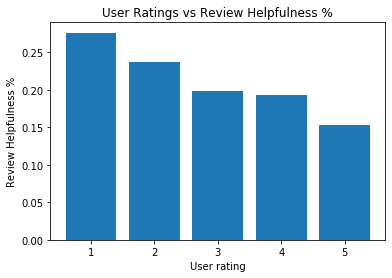

In [229]:
plt.bar(data = reviews_bar, x = 'Overall', height = '%_Helpful', width = 0.8)
plt.xlabel('User rating')
plt.ylabel('Review Helpfulness %')
plt.title('User Ratings vs Review Helpfulness %')
plt.show()

We see that a larger percentage of helpful reviews come from the lower rated reviews. This shows that reviews that are more critical of the products are found more helpful than those that praise the products.

In [13]:
#Creating a dataframe containing the percentage of helpful reviews 
pct_helpful_review = [] 

for i in range(0,len(list(table.index))):
    pct = table.iloc[i][1]/(table.iloc[i][0] + table.iloc[i][1])
    pct_helpful_review.append(pct) #Creating a list of the percentages of helpful reviews from the pivot table 

In [14]:
d = {'%_Helpful_reviews': pct_helpful_review}
percentage_helpful = pd.DataFrame(index = table.index,  data = d)
percentage_helpful.sort_values(ascending = False, by = '%_Helpful_reviews')

,%_Helpful_reviews
category,
software,0.414267
cds_and_vinyl,0.347533
movies,0.307333
video_games,0.221867
musical_instruments,0.212000
luxury_beauty,0.207067
patio,0.176200
all_beauty,0.161000
grocery,0.159867


We can see from the breakdown of helpful reviews that software reviews have the highest share of helpful reviews (41%) followed by cds (34.7%) then movies (30.7%).

In [486]:
#Creating a column to plot the bar graph of helpfulness by %
percentage_helpful['categories'] = list(percentage_helpful.index)
percentage_helpful = percentage_helpful.sort_values(ascending = False, by = '%_Helpful_reviews')

Text(0.5, 1.0, 'Percentage of Reviews Found Helpful by Category')

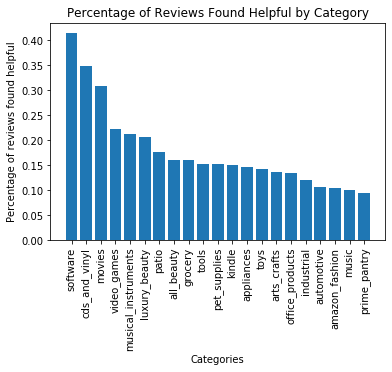

In [487]:
plt.bar(data = percentage_helpful, x = 'categories', height = '%_Helpful_reviews')
plt.xlabel('Categories')
plt.xticks(rotation = 90)
plt.ylabel('Percentage of reviews found helpful')
plt.title('Percentage of Reviews Found Helpful by Category')

The percentage of reviews found helpful vary from category with most of the helpful reviews coming from software, cds and vinyl and movies. These categories are mostly related with technology - with video games being the next highest category.

In [240]:
#Converting reviewTime column to datetime objects for plotting 
from datetime import datetime
review_time = []

for i in range(0,len(reviews['reviewTime'])):
    reviewTime = datetime.strptime(reviews['reviewTime'][i], '%Y-%m-%d')
    review_time.append(reviewTime)
reviews['reviewTime'] = review_time

In [248]:
reviews['year'] = reviews['reviewTime']

In [255]:
year = []
for i in range(0,len(reviews)):
    k = reviews['reviewTime'][i].year
    year.append(k)
reviews['year'] = year

In [257]:
reviews['year'].value_counts() #Viewing all years listed in the dataframe

2016    72565
2015    58125
2017    53637
2014    37927
2018    25637
2013    23259
2012    10425
2011     6268
2010     4535
2009     4248
2008     3550
2007     3172
2006     2157
2005     1986
2004     1649
2003     1515
2002     1467
2001     1346
2000     1188
1999      294
1998       50
Name: year, dtype: int64

In [260]:
date_table = pd.pivot_table(reviews, index = 'year', aggfunc = 'count' , columns = 'Helpful_review',values = 'Helpfulness')

In [261]:
date_table

Helpful_review,no,yes
year,,
1998,24,26
1999,111,183
2000,341,847
2001,422,924
2002,479,988
2003,490,1025
2004,483,1166
2005,541,1445
2006,640,1517


In [266]:
#Creating a table of helpfulness percentages per years
d = {'%_Helpful_reviews': pct_recent_reviews}
dates_percentage_helpful = pd.DataFrame(index = date_table.index,  data = d)
dates_percentage_helpful.sort_values(ascending = False, by = '%_Helpful_reviews')

,%_Helpful_reviews
year,
2005,0.727593
2000,0.712963
2004,0.707095
2006,0.703292
2001,0.686478
2003,0.676568
2002,0.673483
1999,0.622449
2007,0.593632


In [271]:
years = list(range(1998,2019))

In [331]:
dates_percentage_helpful['years'] = years
dates_percentage_helpful['years'] = dates_percentage_helpful['years'].astype(str) #Converting years to strings for labeling 
dates_percentage_helpful 

,%_Helpful_reviews,years
year,,
1998,0.520000,1998
1999,0.622449,1999
2000,0.712963,2000
2001,0.686478,2001
2002,0.673483,2002
2003,0.676568,2003
2004,0.707095,2004
2005,0.727593,2005
2006,0.703292,2006


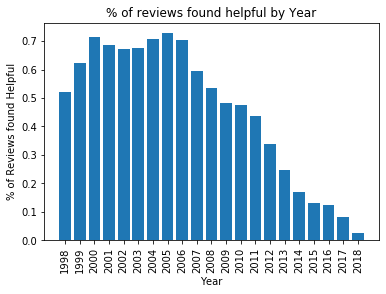

In [334]:
plt.bar(data = dates_percentage_helpful, x = 'years', height = '%_Helpful_reviews')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('% of Reviews found Helpful')
plt.title('% of reviews found helpful by Year')
plt.show()

We see a decline in the percentage of helpful reviews for those posted in the last 10 years. Most reviews need to be posted for quite a bit of time to be considered helpful. 

In [499]:
reviews['year'] = reviews['year'].astype(int) #Converting data type for histogram

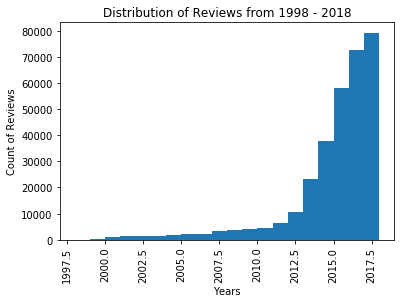

In [503]:
plt.hist(data = reviews, x = 'year', bins = 20)
plt.xlabel('Years')
plt.ylabel('Count of Reviews')
plt.title('Distribution of Reviews from 1998 - 2018')
plt.xticks(rotation = 90)
plt.show()

In [483]:
(reviews.year > 2013).mean()

0.7869555555555555

We can see from the distribution that a majority of the reviews come prior to 2013. Since ~79% of the data comes after 2013, I'm going to query by dates after 2013 and loop through the naive bayes classifier one more time.

In [1778]:
reviews_recent = reviews[reviews['year'] > 2013]

In [1366]:
reviews_recent['Helpfulness'].value_counts()

0    219855
1     28036
Name: Helpfulness, dtype: int64

In [588]:
28036/len(reviews_recent)

0.11309809553392418

In [738]:
reviews_recent['category'].value_counts()

prime_pantry           14874
amazon_fashion         14299
industrial             13686
arts_crafts            13576
automotive             13394
appliances             13338
all_beauty             13273
patio                  13168
luxury_beauty          13058
tools                  12940
pet_supplies           12727
office_products        12517
grocery                12417
toys                   12189
musical_instruments    11771
kindle                 11669
music                  10354
video_games             8485
movies                  8189
software                6278
cds_and_vinyl           5689
Name: category, dtype: int64

We can see that a majority of the categories that had a high percentage of helpful votes had a significant number of reviews prior to 2013.

In [741]:
table_recent = pd.pivot_table(reviews_recent, index = 'category', aggfunc = 'count' , columns = 'Helpful_review',values = 'Helpfulness')
table_recent

Helpful_review,no,yes
category,,
all_beauty,11519,1754
amazon_fashion,12930,1369
appliances,11815,1523
arts_crafts,12082,1494
automotive,12278,1116
cds_and_vinyl,5107,582
grocery,10916,1501
industrial,12390,1296
kindle,10337,1332


In [742]:
#Creating a dataframe containing the percentage of helpful reviews 
pct_recent_reviews = []

for i in range(0,len(list(table_recent.index))):
    pct = table_recent.iloc[i][1]/(table_recent.iloc[i][0] + table_recent.iloc[i][1])
    pct_recent_reviews.append(pct) #Creating a list of the percentages of helpful reviews from 2013-2018

In [745]:
#Creating a table of helpfulness percentages per category for recent reviews(2013-2018)
d = {'%_Helpful_reviews': pct_recent_reviews}
recent_reviews_percentage_helpful = pd.DataFrame(index = table_recent.index,  data = d)
recent_reviews_percentage_helpful.sort_values(ascending = False, by = '%_Helpful_reviews')

,%_Helpful_reviews
category,
software,0.182064
luxury_beauty,0.177975
musical_instruments,0.148501
patio,0.140264
all_beauty,0.132148
movies,0.128587
grocery,0.120883
pet_supplies,0.119431
appliances,0.114185


In [750]:
#Creating a column to plot the bar graph of helpfulness by %
recent_reviews_percentage_helpful['categories'] = list(recent_reviews_percentage_helpful.index)
recent_reviews_percentage_helpful = recent_reviews_percentage_helpful.sort_values(ascending = False, by = '%_Helpful_reviews')

Text(0.5, 1.0, 'Percentage of Reviews Found Helpful by Category from 2013-2018')

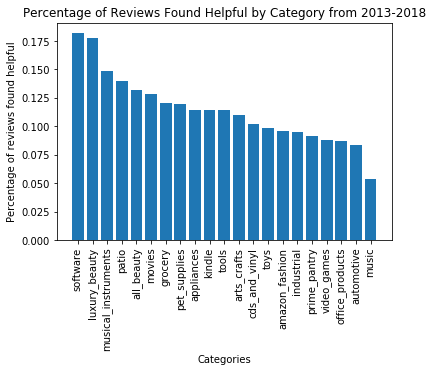

In [752]:
plt.bar(data = recent_reviews_percentage_helpful, x = 'categories', height = '%_Helpful_reviews')
plt.xlabel('Categories')
plt.xticks(rotation = 90)
plt.ylabel('Percentage of reviews found helpful')
plt.title('Percentage of Reviews Found Helpful by Category from 2013-2018')

In [1754]:
#Creating a dataframe of good and bad predictive words for review text from 2013 to 2018

vectorizer = CountVectorizer(min_df = 7)
recent_reviews_text_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews_recent[reviews_recent['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy_top(df, 'lemmatized_reviews', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_reviewText = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_reviewText)
    recent_reviews_text_words = recent_reviews_text_words.append(data_review_text)

In [1755]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,nozzle,0.259988,how,0.000491,all_beauty
1,fortunately,0.189772,fit,0.000482,all_beauty
2,ability,0.135058,good,0.000457,all_beauty
3,1oz,0.135058,love,0.000454,all_beauty
4,typically,0.135058,quality,0.000348,all_beauty
5,hairline,0.135058,them,0.000334,all_beauty
6,ensure,0.135058,brush,0.000304,all_beauty
7,hose,0.115140,nice,0.000253,all_beauty
8,refreshed,0.104833,these,0.000166,all_beauty
9,relief,0.081918,they,0.000102,all_beauty


In [1756]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,undershirt,0.133931,back,0.000775,amazon_fashion
1,slipper,0.120849,big,0.000769,amazon_fashion
2,modern,0.093460,which,0.000763,amazon_fashion
3,fans,0.093460,see,0.000687,amazon_fashion
4,precious,0.093460,she,0.000566,amazon_fashion
5,flop,0.093460,than,0.000557,amazon_fashion
6,proper,0.093460,quality,0.000474,amazon_fashion
7,buttons,0.093460,when,0.000452,amazon_fashion
8,lime,0.093460,from,0.000428,amazon_fashion
9,father,0.093460,great,0.000306,amazon_fashion


In [1757]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,bell,0.243213,fan,0.001115,appliances
1,guys,0.176446,should,0.001070,appliances
2,towels,0.176446,needed,0.001029,appliances
3,whenever,0.176446,perfect,0.000977,appliances
4,hung,0.176446,fast,0.000793,appliances
5,blanket,0.176446,refrigerator,0.000682,appliances
6,bleach,0.176446,fit,0.000595,appliances
7,sized,0.176446,filter,0.000580,appliances
8,horribly,0.176446,original,0.000530,appliances
9,needle,0.176446,works,0.000415,appliances


In [1758]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'arts_crafts']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,intricate,0.067822,nice,0.000203,arts_crafts
1,bill,0.067822,would,0.000199,arts_crafts
2,crafters,0.067822,look,0.000198,arts_crafts
3,winter,0.067822,order,0.000177,arts_crafts
4,thimble,0.051744,quality,0.000174,arts_crafts
5,hunt,0.051744,just,0.000162,arts_crafts
6,grand,0.046260,well,0.000161,arts_crafts
7,reading,0.035101,small,0.000160,arts_crafts
8,erase,0.035101,they,0.000143,arts_crafts
9,cutting,0.035101,good,0.000135,arts_crafts


In [1759]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,hadn,0.059888,buy,0.000168,automotive
1,particularly,0.040739,your,0.000157,automotive
2,effect,0.040739,one,0.000141,automotive
3,industry,0.030868,need,0.000133,automotive
4,buckle,0.030868,light,0.000125,automotive
5,pool,0.030868,time,0.000122,automotive
6,meter,0.030868,work,0.000104,automotive
7,mild,0.030868,quality,0.000097,automotive
8,porsche,0.030868,get,0.000068,automotive
9,expand,0.030868,good,0.000047,automotive


In [1760]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,requiem,0.112043,these,0.000294,cds_and_vinyl
1,daniel,0.112043,track,0.000273,cds_and_vinyl
2,com,0.112043,on,0.000271,cds_and_vinyl
3,via,0.112043,great,0.000240,cds_and_vinyl
4,shostakovich,0.095146,album,0.000226,cds_and_vinyl
5,le,0.089369,my,0.000218,cds_and_vinyl
6,eric,0.077593,just,0.000207,cds_and_vinyl
7,tremendous,0.077593,best,0.000206,cds_and_vinyl
8,warner,0.077593,good,0.000131,cds_and_vinyl
9,warmth,0.077593,you,0.000078,cds_and_vinyl


In [1761]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,msg,0.146142,the,0.000128,grocery
1,pu,0.089090,make,0.000124,grocery
2,flat,0.046622,it,0.000118,grocery
3,gooey,0.046622,use,0.000116,grocery
4,thanksgiving,0.046622,my,0.000095,grocery
5,gag,0.046622,have,0.000084,grocery
6,hurt,0.046622,these,0.000070,grocery
7,cross,0.046622,love,0.000070,grocery
8,novelty,0.046622,great,0.000061,grocery
9,nowhere,0.046622,to,0.000050,grocery


In [1762]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,further,0.075478,small,0.000217,industrial
1,meant,0.075478,product,0.000205,industrial
2,brighter,0.075478,we,0.000203,industrial
3,zip,0.046697,look,0.000203,industrial
4,5v,0.039219,perfect,0.000152,industrial
5,burning,0.039219,great,0.000126,industrial
6,chicken,0.039219,these,0.000124,industrial
7,burst,0.039219,quality,0.000123,industrial
8,photos,0.039219,good,0.000114,industrial
9,individual,0.039219,price,0.000110,industrial


In [1763]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,combat,0.138088,from,0.000114,kindle
1,fiercely,0.096501,me,0.000111,kindle
2,stripper,0.096501,what,0.000110,kindle
3,inhabitant,0.096501,more,0.000101,kindle
4,unpleasant,0.096501,know,0.000099,kindle
5,bogged,0.096501,your,0.000094,kindle
6,jen,0.081732,would,0.000083,kindle
7,smoke,0.074165,they,0.000059,kindle
8,declare,0.050696,read,0.000059,kindle
9,complication,0.050696,you,0.000048,kindle


In [1764]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,3rd,0.138617,hair,0.000408,luxury_beauty
1,warning,0.138617,bottle,0.000348,luxury_beauty
2,physical,0.118246,cream,0.000313,luxury_beauty
3,blackhead,0.107694,product,0.000302,luxury_beauty
4,coola,0.091386,love,0.000297,luxury_beauty
5,burnt,0.074470,good,0.000291,luxury_beauty
6,opt,0.074470,from,0.000259,luxury_beauty
7,mainly,0.074470,scent,0.000235,luxury_beauty
8,newborn,0.074470,great,0.000182,luxury_beauty
9,chipping,0.074470,smell,0.000134,luxury_beauty


In [1765]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,shakespeare,0.331750,still,0.000646,movies
1,grant,0.248665,character,0.000641,movies
2,amy,0.198861,story,0.000634,movies
3,1985,0.198861,use,0.000626,movies
4,pg,0.180759,excellent,0.000617,movies
5,wedding,0.171398,good,0.000605,movies
6,doo,0.141986,show,0.000576,movies
7,katherine,0.141986,too,0.000551,movies
8,passionate,0.141986,come,0.000489,movies
9,learns,0.141986,very,0.000391,movies


In [1766]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,bob,0.060471,would,0.000212,music
1,dreamy,0.060471,great,0.000209,music
2,78,0.046049,track,0.000201,music
3,tool,0.031178,when,0.000196,music
4,pitch,0.031178,beautiful,0.000192,music
5,delicious,0.031178,best,0.000168,music
6,59,0.031178,love,0.000154,music
7,row,0.031178,more,0.000141,music
8,comfort,0.031178,just,0.000118,music
9,26,0.031178,my,0.000110,music


In [1767]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,dr,0.278558,amp,0.000349,musical_instruments
1,beefy,0.099357,works,0.000342,musical_instruments
2,shot,0.099357,still,0.000338,musical_instruments
3,tracks,0.068507,right,0.000326,musical_instruments
4,practicing,0.052275,seem,0.000322,musical_instruments
5,mxr,0.052275,great,0.000299,musical_instruments
6,halloween,0.052275,pedal,0.000283,musical_instruments
7,bleed,0.052275,product,0.000280,musical_instruments
8,attache,0.052275,even,0.000227,musical_instruments
9,wifi,0.052275,nice,0.000148,musical_instruments


In [1768]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,taller,0.087099,my,0.000346,office_products
1,tilt,0.087099,about,0.000342,office_products
2,annoying,0.059802,quality,0.000339,office_products
3,precisely,0.059802,come,0.000275,office_products
4,comfort,0.059802,perfect,0.000220,office_products
5,slippery,0.059802,price,0.000216,office_products
6,nylon,0.059802,nice,0.000212,office_products
7,critical,0.059802,these,0.000209,office_products
8,ripped,0.059802,they,0.000191,office_products
9,stiff,0.059802,use,0.000176,office_products


In [1769]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,commercial,0.141914,could,0.000712,patio
1,stage,0.141914,their,0.000712,patio
2,spout,0.141914,arrive,0.000706,patio
3,burst,0.141914,flag,0.000621,patio
4,www,0.141914,works,0.000520,patio
5,par,0.093682,grill,0.000513,patio
6,lowe,0.076377,put,0.000399,patio
7,secondly,0.076377,great,0.000388,patio
8,earth,0.076377,perfect,0.000323,patio
9,looked,0.076377,nice,0.000294,patio


In [1770]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,strawberry,0.173237,nice,0.000575,pet_supplies
1,command,0.157011,cute,0.000533,pet_supplies
2,stroller,0.157011,lot,0.000513,pet_supplies
3,2x,0.148657,bag,0.000485,pet_supplies
4,log,0.148657,these,0.000447,pet_supplies
5,uv,0.140135,eat,0.000445,pet_supplies
6,cancer,0.122569,long,0.000408,pet_supplies
7,limp,0.122569,great,0.000340,pet_supplies
8,gear,0.122569,toy,0.000290,pet_supplies
9,minimal,0.122569,cat,0.000107,pet_supplies


In [1771]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'prime_pantry']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,regardless,0.225628,stuff,0.000238,prime_pantry
1,hemp,0.172268,some,0.000235,prime_pantry
2,sesame,0.142732,flavor,0.000208,prime_pantry
3,gram,0.142732,taste,0.000203,prime_pantry
4,consume,0.099908,good,0.000186,prime_pantry
5,nutrient,0.097654,them,0.000182,prime_pantry
6,hardly,0.088525,these,0.000168,prime_pantry
7,seed,0.086875,try,0.000159,prime_pantry
8,wave,0.076850,love,0.000151,prime_pantry
9,fatty,0.076850,great,0.000043,prime_pantry


In [1772]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,aftershot,0.513592,easy,0.001616,software
1,32,0.363130,works,0.001528,software
2,plugin,0.232875,hard,0.001335,software
3,color,0.197672,great,0.001271,software
4,black,0.191968,love,0.001226,software
5,transcription,0.174357,found,0.001226,software
6,spot,0.174357,dvd,0.001146,software
7,written,0.174357,computer,0.000858,software
8,proficient,0.174357,game,0.000837,software
9,lightroom,0.174357,learn,0.000621,software


In [1773]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,flapper,0.119828,great,0.000465,tools
1,claimed,0.113580,very,0.000463,tools
2,appeal,0.113580,light,0.000439,tools
3,inspection,0.113580,no,0.000417,tools
4,lip,0.113580,some,0.000360,tools
5,messy,0.113580,works,0.000305,tools
6,fear,0.113580,bulb,0.000304,tools
7,toto,0.096476,really,0.000283,tools
8,rail,0.087674,perfect,0.000254,tools
9,universal,0.074145,price,0.000194,tools


In [1774]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,rocks,0.041389,well,0.000104,toys
1,therefore,0.041389,be,0.000102,toys
2,bedroom,0.041389,these,0.000096,toys
3,cell,0.041389,them,0.000092,toys
4,portion,0.041389,the,0.000081,toys
5,phantom,0.041389,so,0.000069,toys
6,piggy,0.041389,you,0.000064,toys
7,blank,0.041389,great,0.000057,toys
8,dusty,0.041389,and,0.000057,toys
9,been,0.041389,in,0.000042,toys


In [1775]:
recent_reviews_text_words[recent_reviews_text_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,were,0.135777,also,0.000457,video_games
1,castle,0.094809,get,0.000452,video_games
2,dozen,0.072833,game,0.000444,video_games
3,awsome,0.072833,it,0.000435,video_games
4,offline,0.072833,even,0.000431,video_games
5,directions,0.072833,much,0.000364,video_games
6,regularly,0.072833,look,0.000357,video_games
7,apps,0.072833,would,0.000326,video_games
8,door,0.072833,out,0.000282,video_games
9,dumb,0.072833,love,0.000183,video_games


I've noticed in the recent reviews that words that describe the reviewer's sentiment toward a product are often unhelpful. In the software category words such as love, recommend and great are unhelpful. In the music category love, great and awesome are unhelpful words. In the patio category, words such as love, perfect and great are unhelpful. On the other hand I've noticed that the more objective words are helpful.

In [1607]:
#Creating a dataframe of good and bad predictive words for review text from 2013 to 2018

vectorizer = CountVectorizer(min_df = 6)
recent_summaries_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews_recent[reviews_recent['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy_top(df, 'lemmatized_summaries', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_reviewText = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_reviewText)
    recent_summaries_words = recent_summaries_words.append(data_review_text)

In [1608]:
recent_summaries_words[recent_summaries_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,cup,0.123811,four,0.000456,all_beauty
1,beware,0.065991,one,0.000392,all_beauty
2,under,0.065991,good,0.000368,all_beauty
3,empty,0.065991,not,0.000324,all_beauty
4,relief,0.065991,the,0.000313,all_beauty
5,organic,0.065991,product,0.000279,all_beauty
6,tanner,0.065991,be,0.000164,all_beauty
7,wet,0.065991,it,0.000157,all_beauty
8,otherwise,0.065991,five,0.000078,all_beauty
9,gold,0.065991,stars,0.000057,all_beauty


In [1610]:
recent_summaries_words[recent_summaries_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,affordable,0.099018,the,0.000327,amazon_fashion
1,lace,0.099018,nice,0.000299,amazon_fashion
2,regular,0.052088,like,0.000292,amazon_fashion
3,people,0.052088,and,0.000282,amazon_fashion
4,package,0.052088,not,0.000260,amazon_fashion
5,appear,0.052088,star,0.000241,amazon_fashion
6,doesnt,0.052088,for,0.000210,amazon_fashion
7,tad,0.052088,one,0.000209,amazon_fashion
8,winter,0.052088,stars,0.000078,amazon_fashion
9,available,0.052088,five,0.000062,amazon_fashion


In [1611]:
recent_summaries_words[recent_summaries_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,remove,0.204763,part,0.001072,appliances
1,system,0.204763,replacement,0.001046,appliances
2,built,0.161858,easy,0.001013,appliances
3,connector,0.114059,works,0.000967,appliances
4,drip,0.114059,to,0.000899,appliances
5,pan,0.114059,four,0.000711,appliances
6,flaw,0.114059,perfect,0.000670,appliances
7,convenient,0.114059,fit,0.000656,appliances
8,self,0.114059,stars,0.000183,appliances
9,modern,0.114059,five,0.000112,appliances


In [1612]:
recent_summaries_words[recent_summaries_words['category'] == 'arts_crafts']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,carry,0.041038,four,0.000266,arts_crafts
1,longer,0.041038,love,0.000252,arts_crafts
2,stand,0.041038,very,0.000247,arts_crafts
3,crafty,0.041038,great,0.000198,arts_crafts
4,ordered,0.041038,to,0.000193,arts_crafts
5,surprise,0.041038,and,0.000148,arts_crafts
6,learn,0.041038,the,0.000117,arts_crafts
7,stone,0.041038,be,0.000110,arts_crafts
8,instead,0.041038,five,0.000035,arts_crafts
9,cards,0.041038,stars,0.000029,arts_crafts


In [1613]:
recent_summaries_words[recent_summaries_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,dealer,0.047379,this,0.000196,automotive
1,support,0.024264,perfect,0.000180,automotive
2,scratch,0.024264,fit,0.000131,automotive
3,brighter,0.024264,four,0.000129,automotive
4,button,0.024264,great,0.000118,automotive
5,rav4,0.024264,for,0.000111,automotive
6,print,0.024264,it,0.000090,automotive
7,until,0.024264,good,0.000087,automotive
8,cup,0.024264,five,0.000020,automotive
9,night,0.024264,stars,0.000016,automotive


In [1614]:
recent_summaries_words[recent_summaries_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,material,0.023902,album,0.000306,cds_and_vinyl
1,service,0.023902,love,0.000295,cds_and_vinyl
2,solo,0.023902,this,0.000238,cds_and_vinyl
3,smooth,0.023902,and,0.000238,cds_and_vinyl
4,opera,0.023902,be,0.000179,cds_and_vinyl
5,effort,0.023902,of,0.000177,cds_and_vinyl
6,high,0.023902,great,0.000164,cds_and_vinyl
7,was,0.023902,the,0.000113,cds_and_vinyl
8,relaxing,0.023902,five,0.000045,cds_and_vinyl
9,case,0.023902,stars,0.000037,cds_and_vinyl


In [1615]:
recent_summaries_words[recent_summaries_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,msg,0.072689,like,0.000324,grocery
1,10,0.037715,four,0.000267,grocery
2,crunchy,0.037715,taste,0.000232,grocery
3,may,0.037715,for,0.000206,grocery
4,beer,0.037715,love,0.000198,grocery
5,granola,0.037715,good,0.000134,grocery
6,lunch,0.037715,and,0.000134,grocery
7,beautifully,0.037715,great,0.000124,grocery
8,idea,0.037715,five,0.000040,grocery
9,check,0.037715,stars,0.000032,grocery


In [1616]:
recent_summaries_words[recent_summaries_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,special,0.052357,work,0.000209,industrial
1,apply,0.052357,one,0.000195,industrial
2,cleaner,0.026882,product,0.000184,industrial
3,within,0.026882,this,0.000168,industrial
4,results,0.026882,four,0.000159,industrial
5,vise,0.026882,it,0.000099,industrial
6,file,0.026882,good,0.000092,industrial
7,belt,0.026882,great,0.000058,industrial
8,add,0.026882,five,0.000024,industrial
9,thumbs,0.026882,stars,0.000019,industrial


In [1617]:
recent_summaries_words[recent_summaries_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,fall,0.008554,good,0.000037,kindle
1,telling,0.008554,of,0.000034,kindle
2,around,0.008554,to,0.000031,kindle
3,ask,0.008554,this,0.000030,kindle
4,australia,0.008554,five,0.000027,kindle
5,include,0.008554,be,0.000024,kindle
6,awful,0.008554,read,0.000024,kindle
7,imaginative,0.008554,and,0.000023,kindle
8,problem,0.008554,the,0.000018,kindle
9,cozy,0.008554,stars,0.000018,kindle


In [1618]:
recent_summaries_words[recent_summaries_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,holy,0.090115,product,0.000272,luxury_beauty
1,grail,0.090115,to,0.000265,luxury_beauty
2,choice,0.047184,great,0.000259,luxury_beauty
3,davines,0.047184,for,0.000164,luxury_beauty
4,where,0.047184,love,0.000150,luxury_beauty
5,extremely,0.047184,this,0.000142,luxury_beauty
6,foam,0.047184,be,0.000128,luxury_beauty
7,garbage,0.047184,it,0.000117,luxury_beauty
8,gray,0.047184,five,0.000050,luxury_beauty
9,wait,0.047184,stars,0.000040,luxury_beauty


In [1619]:
recent_summaries_words[recent_summaries_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,fall,0.008554,good,0.000037,kindle
1,telling,0.008554,of,0.000034,kindle
2,around,0.008554,to,0.000031,kindle
3,ask,0.008554,this,0.000030,kindle
4,australia,0.008554,five,0.000027,kindle
5,include,0.008554,be,0.000024,kindle
6,awful,0.008554,read,0.000024,kindle
7,imaginative,0.008554,and,0.000023,kindle
8,problem,0.008554,the,0.000018,kindle
9,cozy,0.008554,stars,0.000018,kindle


In [1620]:
recent_summaries_words[recent_summaries_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,holy,0.090115,product,0.000272,luxury_beauty
1,grail,0.090115,to,0.000265,luxury_beauty
2,choice,0.047184,great,0.000259,luxury_beauty
3,davines,0.047184,for,0.000164,luxury_beauty
4,where,0.047184,love,0.000150,luxury_beauty
5,extremely,0.047184,this,0.000142,luxury_beauty
6,foam,0.047184,be,0.000128,luxury_beauty
7,garbage,0.047184,it,0.000117,luxury_beauty
8,gray,0.047184,five,0.000050,luxury_beauty
9,wait,0.047184,stars,0.000040,luxury_beauty


In [1621]:
recent_summaries_words[recent_summaries_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,musical,0.122511,the,0.000654,movies
1,arrive,0.122511,be,0.000586,movies
2,turn,0.065252,four,0.000545,movies
3,fight,0.065252,good,0.000513,movies
4,hear,0.065252,movie,0.000436,movies
5,hit,0.065252,and,0.000425,movies
6,hollywood,0.065252,great,0.000381,movies
7,usual,0.065252,it,0.000363,movies
8,journey,0.065252,five,0.000210,movies
9,kids,0.065252,stars,0.000159,movies


In [1622]:
recent_summaries_words[recent_summaries_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,forever,0.021689,to,0.000185,music
1,last,0.021689,music,0.000182,music
2,superb,0.021689,four,0.000163,music
3,won,0.021689,and,0.000131,music
4,own,0.021689,it,0.000127,music
5,doesn,0.021689,love,0.000110,music
6,listening,0.021689,song,0.000086,music
7,value,0.021689,the,0.000076,music
8,roll,0.021689,five,0.000019,music
9,been,0.021689,stars,0.000017,music


In [1623]:
recent_summaries_words[recent_summaries_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,white,0.01394,great,0.000091,musical_instruments
1,dirty,0.01394,be,0.000071,musical_instruments
2,correct,0.01394,to,0.000063,musical_instruments
3,warning,0.01394,good,0.000053,musical_instruments
4,baritone,0.01394,and,0.000047,musical_instruments
5,red,0.01394,it,0.000043,musical_instruments
6,iphone,0.01394,for,0.000038,musical_instruments
7,knob,0.01394,the,0.000029,musical_instruments
8,lack,0.01394,five,0.000017,musical_instruments
9,leather,0.01394,stars,0.000014,musical_instruments


In [1624]:
recent_summaries_words[recent_summaries_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,sound,0.042907,be,0.000168,office_products
1,since,0.021924,great,0.000162,office_products
2,fabric,0.021924,and,0.000153,office_products
3,canon,0.021924,it,0.000145,office_products
4,hope,0.021924,good,0.000113,office_products
5,lover,0.021924,to,0.000105,office_products
6,cap,0.021924,for,0.000079,office_products
7,anyone,0.021924,the,0.000050,office_products
8,everyone,0.021924,stars,0.000035,office_products
9,trash,0.021924,five,0.000022,office_products


In [1625]:
recent_summaries_words[recent_summaries_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,yes,0.118332,my,0.000559,patio
1,chairs,0.062887,be,0.000515,patio
2,consider,0.062887,love,0.000497,patio
3,flow,0.062887,four,0.000433,patio
4,worm,0.062887,great,0.000379,patio
5,market,0.062887,to,0.000251,patio
6,zero,0.062887,for,0.000246,patio
7,follow,0.062887,it,0.000192,patio
8,promised,0.062887,stars,0.000110,patio
9,both,0.062887,five,0.000071,patio


In [1626]:
recent_summaries_words[recent_summaries_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,tight,0.065156,of,0.000566,pet_supplies
1,wipe,0.065156,four,0.000508,pet_supplies
2,groom,0.065156,like,0.000484,pet_supplies
3,stroller,0.065156,my,0.000442,pet_supplies
4,where,0.065156,one,0.000420,pet_supplies
5,allergy,0.065156,for,0.000375,pet_supplies
6,trip,0.065156,great,0.000362,pet_supplies
7,crab,0.065156,dog,0.000245,pet_supplies
8,dangerous,0.065156,five,0.000088,pet_supplies
9,smart,0.065156,stars,0.000066,pet_supplies


In [1627]:
recent_summaries_words[recent_summaries_words['category'] == 'prime_pantry']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,odor,0.026668,the,0.000134,prime_pantry
1,ready,0.026668,this,0.000132,prime_pantry
2,mask,0.026668,four,0.000116,prime_pantry
3,doesnt,0.026668,it,0.000087,prime_pantry
4,flavorful,0.026668,good,0.000087,prime_pantry
5,beans,0.026668,and,0.000085,prime_pantry
6,cute,0.026668,be,0.000077,prime_pantry
7,hydrate,0.026668,great,0.000066,prime_pantry
8,description,0.026668,five,0.000021,prime_pantry
9,crazy,0.026668,stars,0.000016,prime_pantry


In [1628]:
recent_summaries_words[recent_summaries_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,misleading,0.203199,one,0.001988,software
1,these,0.113089,four,0.001928,software
2,20,0.113089,you,0.001768,software
3,least,0.113089,but,0.001720,software
4,may,0.113089,with,0.001632,software
5,itself,0.113089,use,0.001384,software
6,practice,0.113089,good,0.001137,software
7,probably,0.113089,the,0.001093,software
8,why,0.113089,five,0.000439,software
9,provide,0.113089,stars,0.000304,software


In [1629]:
recent_summaries_words[recent_summaries_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,length,0.012889,four,0.000074,tools
1,manual,0.012889,be,0.000065,tools
2,rate,0.012889,to,0.000051,tools
3,living,0.012889,it,0.000050,tools
4,received,0.012889,good,0.000045,tools
5,remodel,0.012889,and,0.000038,tools
6,incandescent,0.012889,great,0.000032,tools
7,hose,0.012889,the,0.000028,tools
8,wasn,0.012889,five,0.000013,tools
9,bolt,0.012889,stars,0.000010,tools


In [1630]:
recent_summaries_words[recent_summaries_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,had,0.042461,this,0.000302,toys
1,ask,0.042461,four,0.000294,toys
2,itself,0.042461,my,0.000294,toys
3,annoying,0.042461,it,0.000256,toys
4,felt,0.042461,and,0.000154,toys
5,stamp,0.042461,for,0.000153,toys
6,are,0.042461,be,0.000133,toys
7,recommended,0.042461,five,0.000131,toys
8,face,0.042461,the,0.000116,toys
9,line,0.042461,stars,0.000104,toys


In [1631]:
recent_summaries_words[recent_summaries_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,alright,0.040258,be,0.000347,video_games
1,action,0.040258,good,0.000289,video_games
2,sega,0.040258,this,0.000280,video_games
3,remote,0.040258,and,0.000260,video_games
4,expensive,0.040258,for,0.000242,video_games
5,received,0.040258,the,0.000239,video_games
6,flaw,0.040258,it,0.000193,video_games
7,plug,0.040258,great,0.000170,video_games
8,didnt,0.040258,five,0.000065,video_games
9,frustrate,0.040258,stars,0.000050,video_games


In [1389]:
reviews_high = reviews[reviews['overall'] > 3]
reviews_low = reviews[reviews['overall'] < 4]

In [600]:
reviews_high['Helpfulness'].value_counts()[1]/len(reviews_high['Helpfulness'])

0.16001669995743148

In [599]:
reviews_low['Helpfulness'].value_counts()[1]/len(reviews_low['Helpfulness'])

0.24155443639655952

Because there is a significant difference in rating, I separated by reviews rated higher and lower than 3 to find the helpful and unhelpful words. 

In [1390]:
#Creating a dataframe of good and bad predictive words for reviews that rated the product 3 and below

vectorizer = CountVectorizer(min_df = 5)
low_reviews_text_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews_low[reviews_low['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy_top(df, 'lemmatized_reviews', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_reviewText = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_reviewText)
    low_reviews_text_words = low_reviews_text_words.append(data_review_text)

In [1391]:
low_reviews_text_words[low_reviews_text_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,kp,0.286172,small,0.001043,all_beauty
1,ran,0.166978,have,0.000954,all_beauty
2,shopping,0.166978,color,0.000878,all_beauty
3,struggle,0.166978,or,0.000835,all_beauty
4,create,0.166978,when,0.000821,all_beauty
5,above,0.130689,too,0.000821,all_beauty
6,clearly,0.130689,these,0.000789,all_beauty
7,imagine,0.117880,good,0.000696,all_beauty
8,moisturized,0.091095,but,0.000613,all_beauty
9,spent,0.091095,hair,0.000473,all_beauty


In [1392]:
low_reviews_text_words[low_reviews_text_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,listing,0.027323,size,0.000166,amazon_fashion
1,track,0.027323,at,0.000166,amazon_fashion
2,honestly,0.027323,to,0.000161,amazon_fashion
3,expectation,0.027323,them,0.000154,amazon_fashion
4,buck,0.027323,like,0.000147,amazon_fashion
5,select,0.027323,of,0.000113,amazon_fashion
6,website,0.027323,the,0.000110,amazon_fashion
7,appropriate,0.027323,you,0.000109,amazon_fashion
8,appreciate,0.027323,they,0.000097,amazon_fashion
9,weighs,0.027323,not,0.000088,amazon_fashion


In [1393]:
low_reviews_text_words[low_reviews_text_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,rise,0.507404,waste,0.004187,appliances
1,rusty,0.451769,frigidaire,0.004187,appliances
2,auger,0.381967,instal,0.003872,appliances
3,450,0.381967,piece,0.003872,appliances
4,induction,0.381967,recommend,0.003872,appliances
5,propane,0.339947,broke,0.003801,appliances
6,nut,0.291797,something,0.003601,appliances
7,chip,0.291797,amazon,0.003209,appliances
8,plain,0.291797,clothes,0.002814,appliances
9,cancel,0.291797,original,0.002739,appliances


In [1394]:
low_reviews_text_words[low_reviews_text_words['category'] == 'arts_crafts']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,hoop,0.207051,seem,0.003336,arts_crafts
1,carry,0.207051,too,0.003336,arts_crafts
2,friendly,0.207051,again,0.003253,arts_crafts
3,possibly,0.207051,take,0.003174,arts_crafts
4,possible,0.207051,up,0.002830,arts_crafts
5,has,0.207051,this,0.002823,arts_crafts
6,choose,0.207051,thought,0.002412,arts_crafts
7,user,0.207051,cut,0.002368,arts_crafts
8,seat,0.207051,really,0.001671,arts_crafts
9,colorful,0.207051,off,0.001571,arts_crafts


In [1395]:
low_reviews_text_words[low_reviews_text_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,times,0.064906,this,0.000321,automotive
1,odd,0.064906,time,0.000304,automotive
2,nissan,0.054679,one,0.000276,automotive
3,yeah,0.049482,all,0.000275,automotive
4,keys,0.044227,very,0.000267,automotive
5,locksmith,0.033541,use,0.000255,automotive
6,ignition,0.033541,at,0.000248,automotive
7,rattle,0.033541,them,0.000212,automotive
8,2005,0.033541,it,0.000165,automotive
9,bare,0.033541,on,0.000080,automotive


In [1396]:
low_reviews_text_words[low_reviews_text_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,bach,0.673763,they,0.004458,cds_and_vinyl
1,historical,0.478594,new,0.004394,cds_and_vinyl
2,concerto,0.407730,how,0.004394,cds_and_vinyl
3,sony,0.379625,love,0.003907,cds_and_vinyl
4,highlights,0.364548,voice,0.003874,cds_and_vinyl
5,sister,0.314574,way,0.003629,cds_and_vinyl
6,concertos,0.314574,don,0.003601,cds_and_vinyl
7,standards,0.314574,her,0.003518,cds_and_vinyl
8,pink,0.314574,rock,0.003010,cds_and_vinyl
9,clue,0.314574,really,0.001660,cds_and_vinyl


In [1397]:
low_reviews_text_words[low_reviews_text_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,pie,0.258549,go,0.001785,grocery
1,salsa,0.188622,we,0.001732,grocery
2,wide,0.188622,not,0.001722,grocery
3,listing,0.169029,eat,0.001547,grocery
4,pickle,0.104132,time,0.001469,grocery
5,freshly,0.104132,bad,0.001469,grocery
6,sun,0.104132,chocolate,0.001382,grocery
7,suitable,0.104132,have,0.001129,grocery
8,stuffed,0.104132,or,0.001065,grocery
9,spread,0.104132,very,0.000745,grocery


In [1398]:
low_reviews_text_words[low_reviews_text_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,absolute,0.186474,cheap,0.002598,industrial
1,occur,0.186474,money,0.002242,industrial
2,supplier,0.186474,little,0.002158,industrial
3,knife,0.186474,it,0.002141,industrial
4,provided,0.186474,fit,0.002042,industrial
5,tend,0.186474,over,0.002042,industrial
6,magnetic,0.186474,return,0.002042,industrial
7,assembly,0.186474,bought,0.002007,industrial
8,remember,0.186474,item,0.001939,industrial
9,technology,0.160379,than,0.001111,industrial


In [1399]:
low_reviews_text_words[low_reviews_text_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,insta,0.300381,take,0.001930,kindle
1,finger,0.222536,some,0.001892,kindle
2,pathetic,0.222536,so,0.001824,kindle
3,uncle,0.222536,think,0.001808,kindle
4,political,0.222536,see,0.001721,kindle
5,95,0.222536,we,0.001624,kindle
6,path,0.222536,short,0.001504,kindle
7,propaganda,0.222536,will,0.001336,kindle
8,security,0.222536,first,0.001222,kindle
9,comedy,0.176734,their,0.001201,kindle


In [1400]:
low_reviews_text_words[low_reviews_text_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,teeth,0.234167,doesn,0.001607,luxury_beauty
1,faithfully,0.234167,on,0.001598,luxury_beauty
2,eyebrows,0.186546,smell,0.001482,luxury_beauty
3,worse,0.186546,like,0.001473,luxury_beauty
4,recover,0.132610,dry,0.001427,luxury_beauty
5,magazine,0.132610,color,0.001241,luxury_beauty
6,trust,0.132610,with,0.001157,luxury_beauty
7,26,0.132610,hair,0.000985,luxury_beauty
8,bum,0.132610,or,0.000949,luxury_beauty
9,prime,0.132610,at,0.000745,luxury_beauty


In [1401]:
low_reviews_text_words[low_reviews_text_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,running,0.603592,once,0.005713,movies
1,examine,0.477422,true,0.005713,movies
2,whilst,0.477422,star,0.005608,movies
3,exists,0.477422,course,0.005409,movies
4,tool,0.477422,far,0.005135,movies
5,resident,0.415400,because,0.005106,movies
6,critique,0.378519,less,0.004967,movies
7,philosophy,0.378519,tell,0.004967,movies
8,releases,0.378519,she,0.004173,movies
9,classical,0.378519,plot,0.003067,movies


In [1402]:
low_reviews_text_words[low_reviews_text_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,legacy,0.308024,his,0.002920,music
1,total,0.250292,download,0.002920,music
2,point,0.250292,not,0.002901,music
3,small,0.182050,music,0.002882,music
4,sake,0.182050,listen,0.002845,music
5,box,0.182050,her,0.002845,music
6,bottom,0.182050,more,0.002523,music
7,born,0.182050,you,0.002199,music
8,close,0.182050,what,0.002177,music
9,attempt,0.182050,good,0.001522,music


In [1403]:
low_reviews_text_words[low_reviews_text_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,cartridge,0.542691,few,0.002900,musical_instruments
1,casio,0.425845,cable,0.002845,musical_instruments
2,lav,0.372393,ok,0.002845,musical_instruments
3,avail,0.307966,issue,0.002845,musical_instruments
4,indeed,0.307966,box,0.002739,musical_instruments
5,tempo,0.307966,week,0.002642,musical_instruments
6,needle,0.228798,put,0.002508,musical_instruments
7,given,0.228798,product,0.002260,musical_instruments
8,xp,0.228798,violin,0.002028,musical_instruments
9,negative,0.228798,case,0.001058,musical_instruments


In [1404]:
low_reviews_text_words[low_reviews_text_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,settings,0.252463,last,0.002277,office_products
1,mentioned,0.252463,no,0.002055,office_products
2,seconds,0.252463,could,0.002006,office_products
3,failure,0.252463,didn,0.001873,office_products
4,inaccurate,0.252463,return,0.001852,office_products
5,2000,0.252463,will,0.001803,office_products
6,quiet,0.252463,these,0.001613,office_products
7,game,0.252463,buy,0.001441,office_products
8,wheel,0.228103,than,0.001297,office_products
9,technical,0.219627,pen,0.001074,office_products


In [1405]:
low_reviews_text_words[low_reviews_text_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,generac,0.590745,keep,0.003483,patio
1,gray,0.507643,use,0.003468,patio
2,weld,0.452006,work,0.003038,patio
3,120,0.382193,too,0.003023,patio
4,looked,0.291995,fit,0.002817,patio
5,humid,0.291995,time,0.002706,patio
6,extensive,0.291995,hose,0.002637,patio
7,roller,0.291995,water,0.002508,patio
8,inform,0.291995,great,0.002478,patio
9,land,0.291995,return,0.002286,patio


In [1406]:
low_reviews_text_words[low_reviews_text_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,changed,0.091891,work,0.000266,pet_supplies
1,track,0.070539,just,0.000261,pet_supplies
2,safety,0.048158,to,0.000251,pet_supplies
3,started,0.048158,at,0.000247,pet_supplies
4,states,0.048158,will,0.000240,pet_supplies
5,shampoo,0.048158,use,0.000223,pet_supplies
6,improvement,0.048158,so,0.000185,pet_supplies
7,improve,0.048158,get,0.000174,pet_supplies
8,impeller,0.048158,one,0.000161,pet_supplies
9,regard,0.048158,not,0.000071,pet_supplies


In [1407]:
low_reviews_text_words[low_reviews_text_words['category'] == 'prime_pantry']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,roll,0.116160,it,0.000544,prime_pantry
1,word,0.116160,on,0.000534,prime_pantry
2,check,0.061661,good,0.000521,prime_pantry
3,issue,0.061661,not,0.000490,prime_pantry
4,discover,0.061661,use,0.000487,prime_pantry
5,15,0.061661,these,0.000473,prime_pantry
6,likely,0.061661,but,0.000399,prime_pantry
7,term,0.061661,they,0.000375,prime_pantry
8,mushy,0.061661,taste,0.000371,prime_pantry
9,severe,0.061661,like,0.000273,prime_pantry


In [1408]:
low_reviews_text_words[low_reviews_text_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,pane,0.916470,kid,0.012893,software
1,heading,0.796684,message,0.012482,software
2,fraction,0.701588,seller,0.012482,software
3,cooking,0.662074,00,0.011072,software
4,join,0.638115,winzip,0.009701,software
5,ppc,0.610498,operating,0.009467,software
6,alto,0.610498,apple,0.009243,software
7,italicize,0.610498,was,0.009243,software
8,collections,0.610498,game,0.009100,software
9,groups,0.610498,son,0.007933,software


In [1409]:
low_reviews_text_words[low_reviews_text_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,depth,0.274985,not,0.000642,tools
1,perpendicular,0.159410,come,0.000632,tools
2,bolts,0.159410,other,0.000613,tools
3,rebuild,0.112238,return,0.000569,tools
4,darn,0.112238,about,0.000564,tools
5,mask,0.112238,off,0.000510,tools
6,drilling,0.112238,we,0.000497,tools
7,significant,0.112238,go,0.000439,tools
8,vacuum,0.086608,product,0.000378,tools
9,interior,0.059455,light,0.000241,tools


In [1410]:
low_reviews_text_words[low_reviews_text_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,craftsmanship,0.228505,picture,0.002273,toys
1,iphone,0.228505,well,0.002256,toys
2,series,0.228505,daughter,0.002053,toys
3,complicate,0.228505,them,0.002015,toys
4,max,0.228505,her,0.001997,toys
5,question,0.228505,buy,0.001607,toys
6,randomly,0.228505,if,0.001548,toys
7,memory,0.228505,he,0.001540,toys
8,songs,0.181762,son,0.001450,toys
9,developed,0.181762,even,0.001096,toys


In [1411]:
low_reviews_text_words[low_reviews_text_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,morph,0.640651,wheel,0.004527,video_games
1,silver,0.550700,wrong,0.004437,video_games
2,british,0.471293,cool,0.004351,video_games
3,cow,0.471293,order,0.004267,video_games
4,civ,0.471293,seem,0.004227,video_games
5,tolkien,0.471293,car,0.004110,video_games
6,written,0.400679,wasn,0.004035,video_games
7,craft,0.400679,bit,0.003086,video_games
8,animal,0.400679,fit,0.003002,video_games
9,wander,0.400679,easy,0.002924,video_games


In [1632]:
#Creating a dataframe of good and bad predictive words for reviews that rated the product 4 or 5

vectorizer = CountVectorizer(min_df = 6)
high_reviews_text_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews_high[reviews_high['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy_top(df, 'lemmatized_reviews', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_reviewText = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_reviewText)
    high_reviews_text_words = high_reviews_text_words.append(data_review_text)

In [1633]:
high_reviews_text_words[high_reviews_text_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,reliable,0.262397,buy,0.001353,all_beauty
1,glycol,0.262397,great,0.001319,all_beauty
2,indicator,0.262397,super,0.001260,all_beauty
3,faucet,0.262397,love,0.001235,all_beauty
4,advise,0.191698,works,0.001128,all_beauty
5,poor,0.191698,didn,0.001097,all_beauty
6,story,0.191698,receive,0.000933,all_beauty
7,propylene,0.191698,these,0.000884,all_beauty
8,teacher,0.191698,nail,0.000871,all_beauty
9,smelled,0.191698,color,0.000425,all_beauty


In [1634]:
high_reviews_text_words[high_reviews_text_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,disappoint,0.179455,gift,0.000854,amazon_fashion
1,chested,0.098572,only,0.000714,amazon_fashion
2,identical,0.098572,she,0.000696,amazon_fashion
3,shoulders,0.098572,them,0.000641,amazon_fashion
4,town,0.098572,shirt,0.000611,amazon_fashion
5,prettier,0.098572,what,0.000607,amazon_fashion
6,accidentally,0.098572,product,0.000523,amazon_fashion
7,soooo,0.098572,quality,0.000347,amazon_fashion
8,hesitant,0.098572,great,0.000324,amazon_fashion
9,delivered,0.098572,good,0.000297,amazon_fashion


In [1635]:
high_reviews_text_words[high_reviews_text_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,receptacle,0.234862,video,0.001144,appliances
1,awful,0.234862,brand,0.001036,appliances
2,watt,0.211720,fits,0.001022,appliances
3,pizza,0.187134,oem,0.001022,appliances
4,band,0.187134,humidifier,0.001009,appliances
5,sparkle,0.187134,works,0.000916,appliances
6,spinner,0.187134,thank,0.000902,appliances
7,probe,0.187134,perfect,0.000889,appliances
8,surge,0.187134,worked,0.000515,appliances
9,ample,0.187134,replacement,0.000263,appliances


In [1636]:
high_reviews_text_words[high_reviews_text_words['category'] == 'arts_crafts']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,instructional,0.164968,for,0.000374,arts_crafts
1,14,0.141360,paper,0.000364,arts_crafts
2,software,0.116378,small,0.000356,arts_crafts
3,consistent,0.116378,what,0.000356,arts_crafts
4,graphite,0.095321,little,0.000331,arts_crafts
5,operate,0.089899,product,0.000328,arts_crafts
6,serger,0.080717,need,0.000297,arts_crafts
7,charcoal,0.061784,them,0.000277,arts_crafts
8,win,0.061784,perfect,0.000197,arts_crafts
9,mirror,0.061784,nice,0.000182,arts_crafts


In [1637]:
high_reviews_text_words[high_reviews_text_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,inverter,0.164732,put,0.000150,automotive
1,voltage,0.128856,price,0.000145,automotive
2,pigtail,0.089759,great,0.000130,automotive
3,bank,0.089759,light,0.000130,automotive
4,volt,0.084624,works,0.000126,automotive
5,float,0.068865,easy,0.000103,automotive
6,scar,0.068865,nice,0.000097,automotive
7,volts,0.068865,make,0.000074,automotive
8,1500,0.062241,fit,0.000066,automotive
9,charger,0.058054,perfect,0.000064,automotive


In [1638]:
high_reviews_text_words[high_reviews_text_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,maazel,0.576900,rendition,0.003805,cds_and_vinyl
1,robbins,0.538898,air,0.003805,cds_and_vinyl
2,cream,0.538898,heavy,0.003732,cds_and_vinyl
3,tubb,0.517217,tunes,0.003662,cds_and_vinyl
4,schenker,0.517217,remix,0.003662,cds_and_vinyl
5,nightmare,0.493397,vibe,0.003529,cds_and_vinyl
6,finding,0.493397,menuhin,0.003132,cds_and_vinyl
7,lorin,0.493397,awesome,0.003082,cds_and_vinyl
8,lieder,0.493397,soundtrack,0.002795,cds_and_vinyl
9,richter,0.457723,metal,0.001809,cds_and_vinyl


In [1639]:
high_reviews_text_words[high_reviews_text_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,beauty,0.126003,perfect,0.000409,grocery
1,sprout,0.126003,from,0.000407,grocery
2,african,0.126003,they,0.000398,grocery
3,forgotten,0.126003,bag,0.000389,grocery
4,bang,0.126003,favorite,0.000370,grocery
5,bee,0.097576,great,0.000366,grocery
6,bumble,0.097576,nice,0.000364,grocery
7,drain,0.097576,flavor,0.000363,grocery
8,paper,0.082658,too,0.000320,grocery
9,monin,0.067238,order,0.000277,grocery


In [1640]:
high_reviews_text_words[high_reviews_text_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,profile,0.135635,love,0.000427,industrial
1,flawless,0.135635,order,0.000405,industrial
2,hooks,0.135635,our,0.000387,industrial
3,beige,0.115643,perfect,0.000386,industrial
4,bleach,0.105297,easy,0.000346,industrial
5,further,0.094705,great,0.000321,industrial
6,customers,0.094705,small,0.000317,industrial
7,awhile,0.094705,product,0.000270,industrial
8,65,0.094705,these,0.000168,industrial
9,sec,0.094705,price,0.000151,industrial


In [1641]:
high_reviews_text_words[high_reviews_text_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,fog,0.104953,him,0.000138,kindle
1,temperature,0.104953,she,0.000131,kindle
2,intermittent,0.104953,end,0.000124,kindle
3,beside,0.080835,story,0.000120,kindle
4,24,0.068283,great,0.000109,kindle
5,thompson,0.055383,love,0.000108,kindle
6,jonathan,0.055383,what,0.000108,kindle
7,inspector,0.055383,enjoy,0.000099,kindle
8,adolescent,0.055383,he,0.000086,kindle
9,reckon,0.055383,her,0.000065,kindle


In [1642]:
high_reviews_text_words[high_reviews_text_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,section,0.277413,shave,0.000526,luxury_beauty
1,directions,0.133124,smell,0.000472,luxury_beauty
2,science,0.133124,scent,0.000464,luxury_beauty
3,giving,0.133124,buy,0.000462,luxury_beauty
4,1st,0.133124,color,0.000419,luxury_beauty
5,35,0.133124,love,0.000419,luxury_beauty
6,retinol,0.113453,bit,0.000388,luxury_beauty
7,physical,0.113453,shampoo,0.000357,luxury_beauty
8,yesterday,0.092870,very,0.000325,luxury_beauty
9,hairbrush,0.092870,great,0.000077,luxury_beauty


In [1643]:
high_reviews_text_words[high_reviews_text_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,altman,0.792023,battle,0.003614,movies
1,franco,0.644564,powerful,0.003543,movies
2,starring,0.487720,mr,0.003228,movies
3,acorn,0.475540,consider,0.003064,movies
4,92,0.420417,vs,0.002740,movies
5,arias,0.420417,johnny,0.002621,movies
6,dragon,0.420417,program,0.002584,movies
7,poirot,0.420417,horror,0.002478,movies
8,der,0.420417,small,0.002320,movies
9,marx,0.420417,anime,0.002080,movies


In [1644]:
high_reviews_text_words[high_reviews_text_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,tango,0.230099,who,0.000389,music
1,springfield,0.199396,listen,0.000371,music
2,cherry,0.199396,fun,0.000369,music
3,chamber,0.183108,live,0.000358,music
4,victoria,0.110739,recommend,0.000323,music
5,depression,0.110739,nice,0.000295,music
6,73,0.090597,amazon,0.000291,music
7,enormous,0.090597,great,0.000272,music
8,positively,0.090597,awesome,0.000252,music
9,swift,0.090597,he,0.000234,music


In [1645]:
high_reviews_text_words[high_reviews_text_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,perspective,0.234880,switch,0.001043,musical_instruments
1,plugins,0.203708,exactly,0.000983,musical_instruments
2,dsd,0.169888,fender,0.000974,musical_instruments
3,develop,0.169888,these,0.000964,musical_instruments
4,meh,0.169888,every,0.000929,musical_instruments
5,rim,0.169888,them,0.000868,musical_instruments
6,forum,0.169888,speaker,0.000757,musical_instruments
7,strictly,0.169888,works,0.000730,musical_instruments
8,nick,0.169888,cable,0.000677,musical_instruments
9,pulse,0.169888,best,0.000455,musical_instruments


In [1646]:
high_reviews_text_words[high_reviews_text_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,station,0.475343,pencil,0.000769,office_products
1,typewriter,0.270413,gift,0.000755,office_products
2,vista,0.247813,product,0.000622,office_products
3,handset,0.188389,item,0.000601,office_products
4,agenda,0.170751,exactly,0.000588,office_products
5,hearing,0.141431,our,0.000542,office_products
6,having,0.141431,perfect,0.000489,office_products
7,truck,0.141431,card,0.000420,office_products
8,hadn,0.141431,these,0.000284,office_products
9,enjoyable,0.141431,pen,0.000274,office_products


In [1647]:
high_reviews_text_words[high_reviews_text_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,backup,0.213890,last,0.000755,patio
1,consume,0.213890,far,0.000737,patio
2,chamber,0.184831,flag,0.000681,patio
3,strange,0.153541,nice,0.000679,patio
4,needle,0.153541,color,0.000662,patio
5,disappear,0.153541,don,0.000647,patio
6,pine,0.153541,works,0.000589,patio
7,gonna,0.153541,love,0.000419,patio
8,tarp,0.153541,great,0.000405,patio
9,specie,0.153541,perfect,0.000336,patio


In [1648]:
high_reviews_text_words[high_reviews_text_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,hind,0.140894,we,0.000243,pet_supplies
1,stroller,0.140894,dog,0.000243,pet_supplies
2,final,0.140894,toy,0.000232,pet_supplies
3,fluff,0.098558,their,0.000231,pet_supplies
4,were,0.098558,price,0.000222,pet_supplies
5,cleaned,0.098558,them,0.000186,pet_supplies
6,user,0.098558,food,0.000141,pet_supplies
7,motion,0.083503,they,0.000128,pet_supplies
8,log,0.083503,these,0.000097,pet_supplies
9,blades,0.075786,cat,0.000082,pet_supplies


In [1649]:
high_reviews_text_words[high_reviews_text_words['category'] == 'prime_pantry']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,hemp,0.108616,very,0.000170,prime_pantry
1,regardless,0.078592,favorite,0.000162,prime_pantry
2,nutrient,0.073390,nice,0.000150,prime_pantry
3,consume,0.072343,hair,0.000149,prime_pantry
4,unhealthy,0.068129,up,0.000138,prime_pantry
5,oreal,0.068129,good,0.000122,prime_pantry
6,sesame,0.061021,flavor,0.000086,prime_pantry
7,hardly,0.061021,them,0.000069,prime_pantry
8,shame,0.057427,love,0.000066,prime_pantry
9,muscle,0.053804,great,0.000027,prime_pantry


In [1650]:
high_reviews_text_words[high_reviews_text_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,accustom,0.569121,due,0.008188,software
1,construct,0.569121,cookbook,0.007710,software
2,ensure,0.569121,she,0.007577,software
3,modem,0.513778,left,0.007491,software
4,applicator,0.513778,appear,0.006904,software
5,inputting,0.513778,educational,0.006728,software
6,uninstalling,0.513778,ubuntu,0.006106,software
7,31,0.513778,recipe,0.005589,software
8,03,0.513778,chess,0.003606,software
9,encarta,0.480408,bible,0.002993,software


In [1651]:
high_reviews_text_words[high_reviews_text_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,lathe,0.339309,our,0.000877,tools
1,slider,0.235556,product,0.000866,tools
2,software,0.235556,faucet,0.000848,tools
3,milwaukee,0.204318,long,0.000802,tools
4,ebay,0.170419,exactly,0.000802,tools
5,adjustments,0.170419,room,0.000744,tools
6,gives,0.170419,color,0.000738,tools
7,hd,0.170419,bright,0.000580,tools
8,crawl,0.170419,great,0.000564,tools
9,cnc,0.170419,works,0.000518,tools


In [1652]:
high_reviews_text_words[high_reviews_text_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,pc,0.286021,set,0.000466,toys
1,helps,0.166876,piece,0.000459,toys
2,larger,0.166876,gift,0.000441,toys
3,active,0.166876,figure,0.000426,toys
4,29,0.166876,very,0.000423,toys
5,21,0.166876,love,0.000415,toys
6,junk,0.166876,good,0.000402,toys
7,fear,0.166876,kid,0.000402,toys
8,struggle,0.091033,cute,0.000341,toys
9,prices,0.091033,little,0.000232,toys


In [1653]:
high_reviews_text_words[high_reviews_text_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,altogether,0.370189,storyline,0.002930,video_games
1,officer,0.370189,arrive,0.002873,video_games
2,impression,0.339631,cute,0.002818,video_games
3,hotel,0.323213,shooter,0.002665,video_games
4,implement,0.305957,mic,0.002571,video_games
5,kudos,0.305957,sega,0.002571,video_games
6,inferno,0.305957,keyboard,0.001767,video_games
7,holding,0.305957,almost,0.001667,video_games
8,handed,0.305957,works,0.001310,video_games
9,hoyle,0.305957,son,0.001104,video_games


In [1655]:
#Creating a dataframe of good and bad predictive words for reviews that rated the product 3 and below

vectorizer = CountVectorizer(min_df = 5)
low_summaries_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews_low[reviews_low['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy_top(df, 'lemmatized_summaries', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_reviewText = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_reviewText)
    low_summaries_words = low_summaries_words.append(data_review_text)

In [1656]:
low_summaries_words[low_summaries_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,such,0.119972,to,0.000987,all_beauty
1,ve,0.063814,be,0.000933,all_beauty
2,amazon,0.063814,two,0.000920,all_beauty
3,allergic,0.063814,it,0.000857,all_beauty
4,stuff,0.063814,but,0.000801,all_beauty
5,useful,0.063814,three,0.000732,all_beauty
6,reaction,0.063814,the,0.000429,all_beauty
7,jar,0.063814,stars,0.000421,all_beauty
8,looks,0.063814,star,0.000403,all_beauty
9,maybe,0.063814,one,0.000392,all_beauty


In [1658]:
low_summaries_words[low_summaries_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,purse,0.024935,and,0.000219,amazon_fashion
1,line,0.024935,the,0.000211,amazon_fashion
2,correct,0.024935,but,0.000206,amazon_fashion
3,except,0.024935,three,0.000155,amazon_fashion
4,false,0.024935,it,0.000150,amazon_fashion
5,glass,0.024935,not,0.000147,amazon_fashion
6,got,0.024935,be,0.000121,amazon_fashion
7,chart,0.024935,star,0.000109,amazon_fashion
8,cant,0.024935,one,0.000104,amazon_fashion
9,hot,0.024935,stars,0.000096,amazon_fashion


In [1659]:
low_summaries_words[low_summaries_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,wasn,0.298043,two,0.005705,appliances
1,double,0.298043,and,0.005629,appliances
2,beautiful,0.241528,to,0.005279,appliances
3,fast,0.175118,good,0.005151,appliances
4,vent,0.175118,it,0.003811,appliances
5,completely,0.175118,for,0.003777,appliances
6,condition,0.175118,three,0.003067,appliances
7,used,0.175118,star,0.002521,appliances
8,deal,0.175118,stars,0.002253,appliances
9,delivery,0.175118,one,0.002077,appliances


In [1660]:
low_summaries_words[low_summaries_words['category'] == 'arts_crafts']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,save,0.112228,for,0.001127,arts_crafts
1,though,0.059450,not,0.001079,arts_crafts
2,fun,0.059450,and,0.001070,arts_crafts
3,knit,0.059450,to,0.000915,arts_crafts
4,exactly,0.059450,be,0.000883,arts_crafts
5,cross,0.059450,it,0.000799,arts_crafts
6,many,0.059450,star,0.000734,arts_crafts
7,folded,0.059450,three,0.000726,arts_crafts
8,turn,0.059450,one,0.000672,arts_crafts
9,where,0.059450,stars,0.000468,arts_crafts


In [1661]:
low_summaries_words[low_summaries_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,buyer,0.057356,fit,0.000996,automotive
1,head,0.057356,and,0.000935,automotive
2,door,0.057356,but,0.000811,automotive
3,packaging,0.057356,the,0.000741,automotive
4,broken,0.057356,three,0.000724,automotive
5,clean,0.057356,star,0.000668,automotive
6,another,0.057356,it,0.000590,automotive
7,sturdy,0.057356,one,0.000548,automotive
8,ve,0.057356,stars,0.000498,automotive
9,see,0.057356,be,0.000457,automotive


In [1662]:
low_summaries_words[low_summaries_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,cds,0.130128,good,0.007613,cds_and_vinyl
1,vinyl,0.130128,of,0.007073,cds_and_vinyl
2,look,0.130128,for,0.004653,cds_and_vinyl
3,bag,0.130128,and,0.004513,cds_and_vinyl
4,day,0.130128,be,0.004513,cds_and_vinyl
5,buying,0.130128,cd,0.004513,cds_and_vinyl
6,mediocre,0.130128,to,0.004381,cds_and_vinyl
7,series,0.130128,three,0.003921,cds_and_vinyl
8,away,0.130128,the,0.003508,cds_and_vinyl
9,mistake,0.130128,stars,0.002983,cds_and_vinyl


In [1663]:
low_summaries_words[low_summaries_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,disgusting,0.100968,not,0.002038,grocery
1,overprice,0.100968,taste,0.001779,grocery
2,honey,0.100968,be,0.001625,grocery
3,mix,0.100968,and,0.001557,grocery
4,care,0.100968,it,0.001536,grocery
5,came,0.100968,but,0.001476,grocery
6,green,0.100968,star,0.001304,grocery
7,flavorful,0.100968,three,0.001246,grocery
8,new,0.100968,stars,0.000857,grocery
9,first,0.100968,the,0.000790,grocery


In [1664]:
low_summaries_words[low_summaries_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,say,0.069934,do,0.002144,industrial
1,title,0.069934,star,0.001766,industrial
2,ever,0.069934,one,0.001532,industrial
3,crap,0.069934,this,0.001502,industrial
4,luck,0.069934,not,0.001317,industrial
5,fell,0.069934,be,0.001174,industrial
6,seal,0.069934,for,0.001105,industrial
7,made,0.069934,three,0.000976,industrial
8,half,0.069934,it,0.000854,industrial
9,foot,0.069934,stars,0.000621,industrial


In [1665]:
low_summaries_words[low_summaries_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,away,0.130746,be,0.002274,kindle
1,download,0.130746,the,0.002186,kindle
2,left,0.069946,star,0.001975,kindle
3,begin,0.069946,one,0.001831,kindle
4,five,0.069946,read,0.001787,kindle
5,edition,0.069946,but,0.001787,kindle
6,drivel,0.069946,three,0.001598,kindle
7,silly,0.069946,to,0.001366,kindle
8,wasn,0.069946,stars,0.001231,kindle
9,collection,0.069946,good,0.001138,kindle


In [1666]:
low_summaries_words[low_summaries_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,sunscreen,0.152507,my,0.001911,luxury_beauty
1,buying,0.082548,good,0.001911,luxury_beauty
2,company,0.082548,to,0.001449,luxury_beauty
3,contains,0.082548,three,0.001361,luxury_beauty
4,lip,0.082548,the,0.001096,luxury_beauty
5,dcl,0.082548,star,0.000967,luxury_beauty
6,decent,0.082548,stars,0.000856,luxury_beauty
7,texture,0.082548,one,0.000840,luxury_beauty
8,serum,0.082548,be,0.000638,luxury_beauty
9,wash,0.082548,it,0.000624,luxury_beauty


In [1667]:
low_summaries_words[low_summaries_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,these,0.284400,two,0.005202,movies
1,wasn,0.284400,in,0.005069,movies
2,avoid,0.284400,star,0.004396,movies
3,children,0.165773,stars,0.004301,movies
4,home,0.165773,it,0.004166,movies
5,keep,0.165773,of,0.003998,movies
6,totally,0.165773,one,0.003807,movies
7,films,0.165773,and,0.003666,movies
8,interest,0.165773,three,0.003536,movies
9,cool,0.165773,not,0.003221,movies


In [1668]:
low_summaries_words[low_summaries_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,your,0.064391,of,0.003609,music
1,decent,0.064391,for,0.003429,music
2,meh,0.064391,but,0.003267,music
3,wrong,0.064391,to,0.002859,music
4,rock,0.033266,be,0.002745,music
5,same,0.033266,one,0.002452,music
6,nothing,0.033266,three,0.002081,music
7,mp3,0.033266,stars,0.001432,music
8,sound,0.033266,not,0.001348,music
9,money,0.033266,the,0.001091,music


In [1669]:
low_summaries_words[low_summaries_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,ready,0.139722,three,0.001375,musical_instruments
1,might,0.075108,this,0.001329,musical_instruments
2,large,0.075108,it,0.001267,musical_instruments
3,different,0.075108,good,0.001248,musical_instruments
4,doesnt,0.075108,but,0.001211,musical_instruments
5,trumpet,0.075108,star,0.001142,musical_instruments
6,total,0.075108,be,0.001089,musical_instruments
7,elsewhere,0.075108,to,0.001067,musical_instruments
8,excellent,0.075108,one,0.000901,musical_instruments
9,expected,0.075108,stars,0.000820,musical_instruments


In [1670]:
low_summaries_words[low_summaries_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,every,0.155658,good,0.001704,office_products
1,epson,0.155658,two,0.001704,office_products
2,sheet,0.155658,one,0.001673,office_products
3,ruin,0.155658,the,0.001569,office_products
4,sticker,0.121470,for,0.001374,office_products
5,description,0.084397,three,0.001279,office_products
6,image,0.084397,star,0.001123,office_products
7,incorrect,0.084397,and,0.001109,office_products
8,inside,0.084397,be,0.001090,office_products
9,brand,0.084397,stars,0.000787,office_products


In [1671]:
low_summaries_words[low_summaries_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,washer,0.221629,work,0.002897,patio
1,stay,0.221629,the,0.002802,patio
2,deal,0.221629,one,0.002273,patio
3,misleading,0.124625,for,0.002255,patio
4,looking,0.124625,three,0.001822,patio
5,actually,0.124625,and,0.001692,patio
6,red,0.124625,to,0.001528,patio
7,away,0.124625,star,0.001380,patio
8,hand,0.124625,stars,0.001247,patio
9,oem,0.124625,it,0.001129,patio


In [1672]:
low_summaries_words[low_summaries_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,red,0.033671,to,0.000383,pet_supplies
1,problem,0.033671,three,0.000371,pet_supplies
2,customer,0.033671,for,0.000363,pet_supplies
3,minute,0.033671,not,0.000338,pet_supplies
4,know,0.033671,star,0.000326,pet_supplies
5,start,0.033671,one,0.000283,pet_supplies
6,training,0.033671,it,0.000260,pet_supplies
7,stand,0.033671,stars,0.000240,pet_supplies
8,soon,0.033671,be,0.000198,pet_supplies
9,show,0.033671,the,0.000195,pet_supplies


In [1673]:
low_summaries_words[low_summaries_words['category'] == 'prime_pantry']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,isn,0.011261,to,0.000200,prime_pantry
1,prefer,0.011261,it,0.000184,prime_pantry
2,though,0.011261,for,0.000165,prime_pantry
3,dark,0.011261,star,0.000121,prime_pantry
4,most,0.011261,be,0.000116,prime_pantry
5,special,0.011261,one,0.000105,prime_pantry
6,drink,0.011261,three,0.000104,prime_pantry
7,every,0.011261,the,0.000102,prime_pantry
8,expensive,0.011261,not,0.000081,prime_pantry
9,sauce,0.011261,stars,0.000072,prime_pantry


In [1674]:
low_summaries_words[low_summaries_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,flaw,0.642096,that,0.017624,software
1,simplistic,0.472858,only,0.015766,software
2,unreliable,0.472858,one,0.015230,software
3,says,0.472858,two,0.013822,software
4,listen,0.472858,like,0.013409,software
5,put,0.472858,get,0.011088,software
6,purchasing,0.472858,very,0.010566,software
7,pain,0.472858,version,0.010566,software
8,utility,0.472858,star,0.006505,software
9,paper,0.472858,stars,0.005791,software


In [1675]:
low_summaries_words[low_summaries_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,please,0.081825,very,0.002169,tools
1,doesnt,0.081825,one,0.001648,tools
2,miss,0.081825,work,0.001589,tools
3,unit,0.081825,not,0.001508,tools
4,large,0.081825,three,0.001113,tools
5,used,0.081825,star,0.000989,tools
6,name,0.081825,it,0.000918,tools
7,include,0.081825,stars,0.000809,tools
8,also,0.081825,be,0.000602,tools
9,home,0.081825,the,0.000543,tools


In [1676]:
low_summaries_words[low_summaries_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,quite,0.105004,like,0.002853,toys
1,mess,0.105004,of,0.002721,toys
2,perfect,0.105004,to,0.002438,toys
3,model,0.105004,two,0.002295,toys
4,bother,0.105004,this,0.002251,toys
5,got,0.105004,three,0.001483,toys
6,toys,0.105004,star,0.001274,toys
7,card,0.105004,it,0.001116,toys
8,fake,0.105004,one,0.001085,toys
9,useless,0.105004,stars,0.000909,toys


In [1677]:
low_summaries_words[low_summaries_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,cant,0.295980,great,0.005649,video_games
1,happened,0.295980,this,0.005430,video_games
2,enjoy,0.295980,the,0.005389,video_games
3,wait,0.295980,to,0.005294,video_games
4,gift,0.295980,not,0.005280,video_games
5,couple,0.295980,game,0.004865,video_games
6,dead,0.173695,on,0.004453,video_games
7,lasted,0.173695,you,0.004360,video_games
8,warning,0.173695,three,0.003674,video_games
9,war,0.173695,stars,0.002280,video_games


In [1679]:
#Creating a dataframe of good and bad predictive words for reviews that rated the product 4 or 5

vectorizer = CountVectorizer(min_df = 6)
high_summaries_words = pd.DataFrame()
for i in range(0,len(categories)):
    
    df = reviews_high[reviews_high['category'] == categories[i]]
    df = df.reset_index()
    
    _, itest = train_test_split(range(df.shape[0]), train_size=0.7)
    mask = np.zeros(df.shape[0], dtype=np.bool)
    mask[itest] = True
    
    X, y = make_xy_top(df, 'lemmatized_summaries', vectorizer)

    xtrain=X[mask]
    ytrain=y[mask]
    xtest=X[~mask]
    ytest=y[~mask]

    clf = MultinomialNB().fit(xtrain, ytrain)

    #Finding the good and the bad words for predicting helpfulness
    words = np.array(vectorizer.get_feature_names())

    x = np.eye(xtest.shape[1])
    probs = clf.predict_proba(x)[:, 1]
    ind = np.argsort(probs)

    bad_words = words[ind[:10]][::-1]
    good_words = words[ind[-10:]][::-1]

    bad_prob = probs[ind[:10]][::-1]
    good_prob = probs[ind[-10:]][::-1]
    
    d_reviewText = {"Helpful_words": good_words, "Helpful_prob" :good_prob , "Unhelpful_words": bad_words, "Unhelpful_prob": bad_prob, "category": categories[i]}
    
    data_review_text = pd.DataFrame(data = d_reviewText)
    high_summaries_words = high_summaries_words.append(data_review_text)

In [1680]:
high_summaries_words[high_summaries_words['category'] == 'all_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,handheld,0.378114,perfect,0.003671,video_games
1,ride,0.288429,work,0.003671,video_games
2,release,0.233132,awesome,0.002695,video_games
3,sims,0.212739,to,0.002575,video_games
4,two,0.168517,great,0.001950,video_games
5,god,0.168517,my,0.001873,video_games
6,promise,0.168517,four,0.001873,video_games
7,improvement,0.168517,good,0.000844,video_games
8,learn,0.168517,five,0.000316,video_games
9,addict,0.168517,stars,0.000269,video_games


In [1681]:
high_summaries_words[high_summaries_words['category'] == 'amazon_fashion']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,detail,0.063896,great,0.000662,amazon_fashion
1,unique,0.063896,fit,0.000598,amazon_fashion
2,expensive,0.063896,very,0.000550,amazon_fashion
3,handy,0.063896,four,0.000539,amazon_fashion
4,ordered,0.063896,but,0.000458,amazon_fashion
5,touch,0.063896,good,0.000452,amazon_fashion
6,mask,0.063896,nice,0.000440,amazon_fashion
7,around,0.063896,and,0.000242,amazon_fashion
8,is,0.063896,stars,0.000125,amazon_fashion
9,onesie,0.063896,five,0.000081,amazon_fashion


In [1682]:
high_summaries_words[high_summaries_words['category'] == 'appliances']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,cooking,0.181625,and,0.001137,appliances
1,double,0.181625,easy,0.001120,appliances
2,efficient,0.128886,works,0.001103,appliances
3,broan,0.128886,replacement,0.001079,appliances
4,trash,0.128886,work,0.000960,appliances
5,wasn,0.128886,fit,0.000896,appliances
6,identical,0.128886,great,0.000780,appliances
7,mine,0.128886,perfect,0.000728,appliances
8,heating,0.128886,stars,0.000320,appliances
9,home,0.128886,five,0.000246,appliances


In [1683]:
high_summaries_words[high_summaries_words['category'] == 'arts_crafts']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,bow,0.04369,four,0.000273,arts_crafts
1,making,0.04369,to,0.000272,arts_crafts
2,detailed,0.04369,love,0.000264,arts_crafts
3,week,0.04369,good,0.000250,arts_crafts
4,pearl,0.04369,it,0.000191,arts_crafts
5,had,0.04369,and,0.000182,arts_crafts
6,paints,0.04369,be,0.000172,arts_crafts
7,binding,0.04369,for,0.000155,arts_crafts
8,binder,0.04369,five,0.000073,arts_crafts
9,beginners,0.04369,stars,0.000065,arts_crafts


In [1684]:
high_summaries_words[high_summaries_words['category'] == 'automotive']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,parts,0.035147,my,0.000260,automotive
1,probably,0.035147,perfect,0.000238,automotive
2,we,0.035147,four,0.000203,automotive
3,rid,0.035147,fit,0.000200,automotive
4,wife,0.035147,be,0.000166,automotive
5,surprised,0.035147,for,0.000157,automotive
6,improvement,0.035147,it,0.000154,automotive
7,safety,0.035147,good,0.000138,automotive
8,investment,0.035147,five,0.000060,automotive
9,civic,0.035147,stars,0.000052,automotive


In [1685]:
high_summaries_words[high_summaries_words['category'] == 'cds_and_vinyl']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,between,0.379801,good,0.003527,cds_and_vinyl
1,air,0.289902,band,0.003507,cds_and_vinyl
2,1979,0.289902,beautiful,0.003391,cds_and_vinyl
3,usual,0.289902,awesome,0.003391,cds_and_vinyl
4,program,0.289902,very,0.003230,cds_and_vinyl
5,game,0.289902,it,0.002801,cds_and_vinyl
6,overall,0.289902,excellent,0.002545,cds_and_vinyl
7,beyond,0.289902,four,0.002368,cds_and_vinyl
8,clear,0.169524,five,0.000385,cds_and_vinyl
9,versions,0.169524,stars,0.000327,cds_and_vinyl


In [1686]:
high_summaries_words[high_summaries_words['category'] == 'grocery']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,arrived,0.045684,it,0.000443,grocery
1,salmon,0.045684,my,0.000374,grocery
2,sell,0.045684,great,0.000355,grocery
3,nutrition,0.045684,taste,0.000339,grocery
4,plus,0.045684,four,0.000323,grocery
5,pork,0.045684,love,0.000251,grocery
6,potato,0.045684,this,0.000241,grocery
7,crisp,0.045684,be,0.000173,grocery
8,tell,0.045684,five,0.000049,grocery
9,de,0.045684,stars,0.000043,grocery


In [1687]:
high_summaries_words[high_summaries_words['category'] == 'industrial']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,open,0.080566,this,0.000371,industrial
1,oscilloscope,0.041974,work,0.000359,industrial
2,stethoscope,0.041974,quality,0.000353,industrial
3,son,0.041974,good,0.000270,industrial
4,include,0.041974,product,0.000246,industrial
5,instruction,0.041974,four,0.000235,industrial
6,show,0.041974,be,0.000175,industrial
7,grill,0.041974,for,0.000140,industrial
8,lamp,0.041974,five,0.000035,industrial
9,led,0.041974,stars,0.000031,industrial


In [1688]:
high_summaries_words[high_summaries_words['category'] == 'kindle']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,continues,0.019228,good,0.000071,kindle
1,marriage,0.019228,of,0.000066,kindle
2,superb,0.019228,five,0.000064,kindle
3,copy,0.019228,to,0.000064,kindle
4,subject,0.019228,be,0.000059,kindle
5,warrior,0.019228,read,0.000050,kindle
6,style,0.019228,stars,0.000046,kindle
7,watch,0.019228,and,0.000046,kindle
8,weight,0.019228,great,0.000044,kindle
9,date,0.019228,the,0.000040,kindle


In [1689]:
high_summaries_words[high_summaries_words['category'] == 'luxury_beauty']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,zoya,0.09158,skin,0.001038,luxury_beauty
1,yummy,0.09158,four,0.000763,luxury_beauty
2,cnd,0.09158,for,0.000738,luxury_beauty
3,us,0.09158,this,0.000624,luxury_beauty
4,didn,0.09158,product,0.000591,luxury_beauty
5,though,0.09158,great,0.000440,luxury_beauty
6,lavender,0.09158,be,0.000352,luxury_beauty
7,left,0.09158,love,0.000286,luxury_beauty
8,masque,0.09158,stars,0.000188,luxury_beauty
9,blue,0.09158,five,0.000107,luxury_beauty


In [1690]:
high_summaries_words[high_summaries_words['category'] == 'movies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,light,0.272107,and,0.005293,movies
1,zombie,0.199500,watch,0.005275,movies
2,italian,0.199500,good,0.004702,movies
3,usa,0.199500,fun,0.004004,movies
4,level,0.199500,on,0.003548,movies
5,wild,0.199500,love,0.003049,movies
6,minute,0.199500,great,0.002156,movies
7,morning,0.199500,four,0.001990,movies
8,omg,0.199500,five,0.000401,movies
9,paul,0.199500,stars,0.000338,movies


In [1691]:
high_summaries_words[high_summaries_words['category'] == 'music']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,20,0.050712,it,0.000436,music
1,open,0.050712,of,0.000419,music
2,addition,0.050712,four,0.000332,music
3,grow,0.050712,music,0.000290,music
4,studio,0.050712,great,0.000254,music
5,type,0.050712,this,0.000203,music
6,understand,0.050712,love,0.000199,music
7,actually,0.050712,song,0.000137,music
8,cute,0.050712,five,0.000046,music
9,ride,0.050712,stars,0.000041,music


In [1692]:
high_summaries_words[high_summaries_words['category'] == 'musical_instruments']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,single,0.108729,be,0.001319,musical_instruments
1,action,0.108729,nice,0.001282,musical_instruments
2,rocks,0.108729,and,0.001243,musical_instruments
3,screw,0.108729,but,0.001206,musical_instruments
4,table,0.108729,quality,0.001172,musical_instruments
5,accurate,0.108729,very,0.001007,musical_instruments
6,played,0.108729,it,0.000886,musical_instruments
7,playable,0.108729,four,0.000802,musical_instruments
8,effects,0.108729,five,0.000152,musical_instruments
9,budget,0.108729,stars,0.000128,musical_instruments


In [1693]:
high_summaries_words[high_summaries_words['category'] == 'office_products']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,staple,0.080476,this,0.000825,office_products
1,floor,0.080476,good,0.000802,office_products
2,weight,0.080476,great,0.000744,office_products
3,compatible,0.080476,product,0.000705,office_products
4,couple,0.080476,and,0.000694,office_products
5,purple,0.080476,be,0.000650,office_products
6,true,0.080476,four,0.000518,office_products
7,miss,0.080476,for,0.000298,office_products
8,ship,0.080476,five,0.000086,office_products
9,enjoy,0.080476,stars,0.000074,office_products


In [1694]:
high_summaries_words[high_summaries_words['category'] == 'patio']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,round,0.072192,love,0.000627,patio
1,hope,0.072192,be,0.000583,patio
2,lightweight,0.072192,great,0.000561,patio
3,kind,0.072192,and,0.000555,patio
4,covers,0.072192,the,0.000508,patio
5,kid,0.072192,four,0.000486,patio
6,smell,0.072192,to,0.000389,patio
7,mouse,0.072192,it,0.000320,patio
8,trim,0.072192,five,0.000156,patio
9,name,0.072192,stars,0.000134,patio


In [1695]:
high_summaries_words[high_summaries_words['category'] == 'pet_supplies']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,guy,0.082772,great,0.000319,pet_supplies
1,net,0.043173,the,0.000273,pet_supplies
2,ferrets,0.043173,product,0.000273,pet_supplies
3,terrier,0.043173,for,0.000264,pet_supplies
4,grey,0.043173,good,0.000245,pet_supplies
5,extra,0.043173,and,0.000172,pet_supplies
6,pooch,0.043173,dog,0.000171,pet_supplies
7,supplement,0.043173,be,0.000169,pet_supplies
8,performance,0.043173,five,0.000057,pet_supplies
9,mouse,0.043173,stars,0.000048,pet_supplies


In [1696]:
high_summaries_words[high_summaries_words['category'] == 'prime_pantry']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,ginger,0.022463,this,0.000236,prime_pantry
1,white,0.022463,of,0.000227,prime_pantry
2,treats,0.022463,taste,0.000219,prime_pantry
3,true,0.022463,great,0.000184,prime_pantry
4,hands,0.022463,love,0.000113,prime_pantry
5,late,0.022463,four,0.000102,prime_pantry
6,thin,0.022463,good,0.000080,prime_pantry
7,hate,0.022463,the,0.000076,prime_pantry
8,clear,0.022463,five,0.000018,prime_pantry
9,convenience,0.022463,stars,0.000015,prime_pantry


In [1697]:
high_summaries_words[high_summaries_words['category'] == 'software']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,draft,0.563340,awesome,0.016271,software
1,hit,0.563340,money,0.015678,software
2,getting,0.563340,review,0.015126,software
3,hour,0.462387,on,0.015126,software
4,access,0.462387,that,0.014612,software
5,encarta,0.462387,windows,0.012138,software
6,reference,0.462387,like,0.009902,software
7,library,0.462387,four,0.005554,software
8,visual,0.462387,five,0.001305,software
9,paint,0.462387,stars,0.001058,software


In [1698]:
high_summaries_words[high_summaries_words['category'] == 'tools']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,plus,0.175826,great,0.001053,tools
1,three,0.175826,perfect,0.001025,tools
2,impressed,0.175826,to,0.001025,tools
3,bosch,0.096387,work,0.000927,tools
4,combo,0.096387,the,0.000824,tools
5,garden,0.096387,good,0.000817,tools
6,ground,0.096387,product,0.000711,tools
7,otherwise,0.096387,four,0.000623,tools
8,while,0.096387,five,0.000108,tools
9,hardware,0.096387,stars,0.000092,tools


In [1699]:
high_summaries_words[high_summaries_words['category'] == 'toys']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,pick,0.070799,great,0.000730,toys
1,once,0.070799,very,0.000692,toys
2,bubble,0.070799,and,0.000566,toys
3,stuff,0.070799,good,0.000504,toys
4,couldn,0.070799,to,0.000498,toys
5,dark,0.070799,four,0.000495,toys
6,save,0.070799,fun,0.000453,toys
7,imagination,0.070799,five,0.000306,toys
8,display,0.070799,stars,0.000267,toys
9,truly,0.070799,be,0.000249,toys


In [1700]:
high_summaries_words[high_summaries_words['category'] == 'video_games']

,Helpful_words,Helpful_prob,Unhelpful_words,Unhelpful_prob,category
0,handheld,0.378114,perfect,0.003671,video_games
1,ride,0.288429,work,0.003671,video_games
2,release,0.233132,awesome,0.002695,video_games
3,sims,0.212739,to,0.002575,video_games
4,two,0.168517,great,0.001950,video_games
5,god,0.168517,my,0.001873,video_games
6,promise,0.168517,four,0.001873,video_games
7,improvement,0.168517,good,0.000844,video_games
8,learn,0.168517,five,0.000316,video_games
9,addict,0.168517,stars,0.000269,video_games


In [672]:
pct_recent_reviews = []
for i in range(0,len(list(table_recent.index))):
    pct = table_recent.iloc[i][1]/(table_recent.iloc[i][0] + table_recent.iloc[i][1])
    pct_recent_reviews.append(pct) #Creating a list of the percentages of helpful reviews from 2013-2018

In [351]:
#Creating buckets of words for review lengths
buckets = []
for i in range(0,len(reviews)):
    if reviews['review_length'][i] < 51:
        k = '0-50'
    elif reviews['review_length'][i] < 101:
        k = '51-100'
    elif reviews['review_length'][i] < 251:
        k = '101-250'
    elif reviews['review_length'][i] < 501:
        k = '251-500'
    elif reviews['review_length'][i] < 1001:
        k = '500-1000'
    elif reviews['review_length'][i] < 2001:
        k = '1001 - 2000'
    elif reviews['review_length'][i] < 3001:
        k = '2001-3000'
    elif reviews['review_length'][i] >= 3000:
        k = '>3000'
    buckets.append(k)
reviews['review_length_buckets'] = buckets 

In [356]:
#Creating buckets of words for summary lengths
buckets_summaries = []
for i in range(0,len(reviews)):
    if reviews['summary_length'][i] < 6:
        j = '0-5'
    elif reviews['summary_length'][i] < 11:
        j = '6-10'
    elif reviews['summary_length'][i] < 21:
        j = '11-20'
    elif reviews['summary_length'][i] < 31:
        j = '21-30'
    elif reviews['summary_length'][i] >= 31:
        j = '>30'
    buckets_summaries.append(j)
reviews['summary_length_buckets'] = buckets_summaries

In [421]:
#Creating a column that counts line breaks 
line_breaks = []
for i in range(0, len(reviews)):
    lines = reviews['reviewText'][i].count('\n')
    line_breaks.append(lines)
reviews['line_breaks'] = line_breaks

In [422]:
#Viewing the top 5 line breaks 
reviews['line_breaks'].value_counts().head()

0    276824
2     11016
1      8062
4      5553
6      3172
Name: line_breaks, dtype: int64

In [423]:
#Splitting up reviews into helpful and not helpful groups
helpful = reviews.query("Helpful_review == 'yes'")
not_helpful = reviews.query("Helpful_review == 'no'")

Text(0.5, 1.0, 'Helpfulness Status by Length of Reviews')

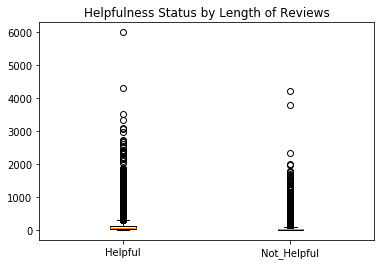

In [337]:
#Creating boxplots of helpfulness by reviewText length

review_length_dict = {'Helpful': helpful['review_length'], 'Not_Helpful':not_helpful['review_length']}

fig, ax = plt.subplots()
ax.boxplot(review_length_dict.values())
ax.set_xticklabels(review_length_dict.keys())
ax.set_title('Helpfulness Status by Length of Reviews')

In [83]:
helpful['review_length'].describe()

count    56169.000000
mean       113.731507
std        155.226801
min          0.000000
25%         32.000000
50%         67.000000
75%        135.000000
max       6003.000000
Name: review_length, dtype: float64

In [84]:
not_helpful['review_length'].describe()

count    258831.000000
mean         34.787240
std          60.603503
min           0.000000
25%           6.000000
50%          19.000000
75%          39.000000
max        4209.000000
Name: review_length, dtype: float64

In [354]:
helpful['review_length_buckets'].value_counts()

0-50           22274
51-100         14295
101-250        13829
251-500         4313
500-1000        1235
1001 - 2000      198
2001-3000         19
>3000              6
Name: review_length_buckets, dtype: int64

In [355]:
not_helpful['review_length_buckets'].value_counts()

0-50           211003
51-100          29751
101-250         14911
251-500          2549
500-1000          551
1001 - 2000        62
2001-3000           2
>3000               2
Name: review_length_buckets, dtype: int64

In [383]:
review_text_bucket_df=pd.DataFrame(helpful['review_length_buckets'].value_counts()/reviews['review_length_buckets'].value_counts())
review_text_bucket_df

,review_length_buckets
0-50,0.095483
51-100,0.324547
101-250,0.481176
251-500,0.628534
500-1000,0.691489
1001 - 2000,0.761538
2001-3000,0.904762
>3000,0.750000


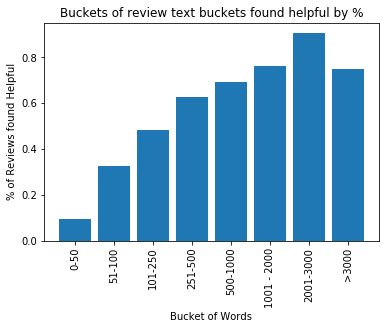

In [387]:
plt.bar(data = review_text_bucket_df, x = review_text_bucket_df.index, height = 'review_length_buckets')
plt.xlabel('Bucket of Words')
plt.ylabel('% of Reviews found Helpful')
plt.xticks(rotation = 90)
plt.title('Buckets of review text buckets found helpful by %')
plt.show()

We see that there is a gradual increase in how helpful reviews are depending on the word count in the review. 

Text(0.5, 1.0, 'Helpfulness Status by Length of Summaries')

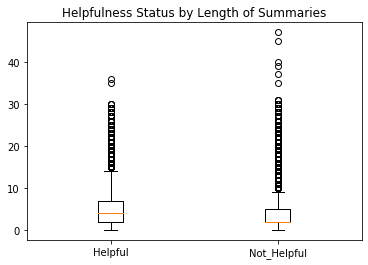

In [451]:
#Creating boxplots of helpfulness by summary length

summary_length_dict = {'Helpful': helpful['summary_length'], 'Not_Helpful':not_helpful['summary_length']}

fig, ax = plt.subplots()
ax.boxplot(summary_length_dict.values())
ax.set_xticklabels(summary_length_dict.keys())
ax.set_title('Helpfulness Status by Length of Summaries')

In [ ]:
There is no clear relationship between the count of line breaks and the percentage of helpful votes

In [87]:
helpful['summary_length'].describe()

count    56169.000000
mean         5.217878
std          3.685096
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: summary_length, dtype: float64

In [88]:
not_helpful['summary_length'].describe()

count    258831.000000
mean          4.083128
std           3.468818
min           0.000000
25%           2.000000
50%           2.000000
75%           5.000000
max          47.000000
Name: summary_length, dtype: float64

In [360]:
helpful['summary_length_buckets'].value_counts()

0-5      35737
6-10     15576
11-20     4591
21-30      263
>30          2
Name: summary_length_buckets, dtype: int64

In [362]:
not_helpful['summary_length_buckets'].value_counts()

0-5      199367
6-10      43100
11-20     15635
21-30       720
>30           9
Name: summary_length_buckets, dtype: int64

In [388]:
summary_text_bucket_df=pd.DataFrame(helpful['summary_length_buckets'].value_counts()/reviews['summary_length_buckets'].value_counts())
summary_text_bucket_df

,summary_length_buckets
0-5,0.152005
6-10,0.265458
11-20,0.226985
21-30,0.267548
>30,0.181818


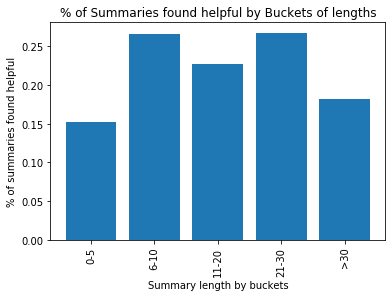

In [389]:
plt.bar(data = summary_text_bucket_df, x = summary_text_bucket_df.index, height = 'summary_length_buckets')
plt.xlabel('Summary length by buckets')
plt.ylabel('% of summaries found helpful')
plt.xticks(rotation = 90)
plt.title('% of Summaries found helpful by Buckets of lengths')
plt.show()

We see that the summaries with the highest percentages found useful are between 6 and 30 words. 

In [1776]:
reviews.to_csv('Updated_reviews.csv')